# Planetary Heating and Atmospheres

## Solar Heating and Energy Transport
**Temperature** is a fundamental property of matter, where it is especially important for determining the potential for life to flourish on the surface of a planet.  For example, water $(\rm H_2O)$ is a liquid between $273-372\ {\rm K}$ at stand pressure ($1\ {\rm bar}$), a gas at higher temperatures, and a solid (i.e., ice) when it is at lower temperatures.  All three phases of water occur naturally on Earth, but the liquid phase is not seen on the surface of any other planet in our Solar System.  

Rocks undergo similar transitions at substantially higher temperatures.  Liquid rock is present in the Earth's mantle (as magma), which can be seen on the Earth's surface during a volcanic eruption (e.g., lava flows).  Some other substances are only in vapor form on Earth's surface.  For example, carbon dioxide $(\rm CO_2)$ exists in gas form, and when cooled to $194.7\ {\rm K}$, it freezes into a substance known as *dry ice*.  No liquid phase of $\rm CO_2$ exists on Earth's surface because liquid $\rm CO_2$ is only stable at pressures $> 5.1\ {\rm bar}$.  All three phases of methane $(\rm CH_4)$ exist at standard pressure, but methane condenses and freezes at lower temperatures.

Most substances expand when heated, where gases increase in volume the most.  The equilibrium molecular composition of a given mixture of atoms often depends on temperature (and pressure), and the time required for a mixture to reach chemical equilibrium generally increases rapidly as the temperature drops.  Gradients in temperature and pressure are responsible for large mass flows (e.g., atmospheric winds and ocean currents) as well as convective motions that can mix fluid material within planetary atmospheres and interiors.  Earth's solid crust is dragged along by convective currents in the mantle, which leads to continental drift.

A measure of the random kinetic energy of matter (i.e., molecules, atoms, ions, etc.) is represented by a temperature $T$.  The energy of a *perfect* gas is given by 

\begin{align}
E = \frac{3}{2}NkT,
\end{align}

which depends on the number of particles $N$ and Boltzmann's constant $k$.  The temperature of a body is determined by a combination of processes.  Solar radiation is the primary energy source for most planetary bodies, where radiation to space is the primary loss mechanism.  The equilibrium state of a planetary surface is determined by a balance of energy gained and lost, where the details of energy transport determine the relative amounts.

A point on the surface of a planet is only illuminated by the Sun during the day (i.e., when the surface faces the Sun), but it radiates during both day and night.  The amount of energy incident per unit area depends on the distance from the Sun and the local elevation angle of the Sun (i.e., how direct the sunlight is).  As a consequence, most locales are coldest around sunrise and hottest a little after local noon.  The polar region are (on average) colder than the equator as long as the axial tilt (or obliquity) is less than $54^\circ$ for prograde rotators and greater than $126^\circ$ for retrograde rotators.

Over the long term, most planetary bodies radiate almost the same amount of energy to space as they absorb from sunlight.  The giant planets (Jupiter, Saturn, and Neptune) are exceptions to this rule, where these bodies radiate significantly more energy than they absorb because they are still losing heat produced during the time of their formation.  Spatial and temporal fluctuations can be large, while long-term global equilibrium is the norm.  Energy stored from day-to-night, perihelion-to-aphelion, and summer-to-winter can be transported from one location to another on a planet's surface.

```{figure-md} EM-spectrum-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Electromagnetic_spectrum_-eng.svg/1280px-Electromagnetic_spectrum_-eng.svg.png" alt="EM Spectrum"  width="800px">

The electromagnetic spectrum. Image credit: Wikimedia Commons by user [Horst Frank](https://commons.wikimedia.org/wiki/File:Electromagnetic_spectrum_-eng.svg).
```

### Thermal (Blackbody) Radiation
Electromagnetic (EM) radiation consists of photons at many wavelengths, where a spectrum is shown in Fig. {numref}`{number}<EM-spectrum-fig>`.  The frequency $\nu$ of an EM wave propagating in a vacuum is related to its wavelength $\lambda$ by

\begin{align}
\lambda \nu = c,
\end{align}

where the speed of light $c$ in a vacuum is $299,792,458\ {\rm m/s}$.

Most objects emit a continuous spectrum of EM radiation, where this **thermal emission** is well approximated by the theory of *blackbody* radiation.  A [blackbody](https://en.wikipedia.org/wiki/Black_body) is an object that absorbs all radiation that falls onto it at all frequencies and angles of incidence (i.e., no radiation is reflected or scattered).  A body's capacity to emit radiation is the same as its capability of absorbing radiation at the same frequency.  The radiation emitted by a blackbody is described by [Planck's radiation law](https://en.wikipedia.org/wiki/Planck%27s_law):

```{math}
:label: Plancks_law
B_\nu(T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{h\nu/(kT)}-1},
```

which describes the **brightness** $B_\nu(T)$ in units of $\rm W/m^2/Hz/sr$ and depends on Planck's constant $h$.  Figure {numref}`{number}<blackbody>` shows the brightness as a function of frequency (Fig. {numref}`{number}<blackbody>`a) with effective temperatures from $40-30,000\ {\rm K}$, and a spectrum of our Sun (Fig. {numref}`{number}<blackbody>`b) as a function of wavelength.  The blackbody curves for $6000\ {\rm K}$ (Fig. {numref}`{number}<blackbody>`a) and $5800\ {\rm K}$ (Fig. {numref}`{number}<blackbody>`b) are representative of the solar spectrum (Eqn. {eq}`Plancks_law`) within the respective regime (frequency or wavelength).  These two figures show that the Sun's brightness peaks (i.e., highest intensity) at optical wavelengths, while planets will peak at infrared wavelengths due to their surface temperatures $(\sim 40-700\ {\rm K})$.

```{glue:figure} blackbody_fig
:figwidth: 600px
:name: "blackbody"

(a) Blackbody radiation curves $B_\nu(T)$ at various temperatures. (b) Solar spectrum as a function of wavelength between $100-2500\ {\rm nm}$. A blackbody spectrum at 5777 K is superposed.
```

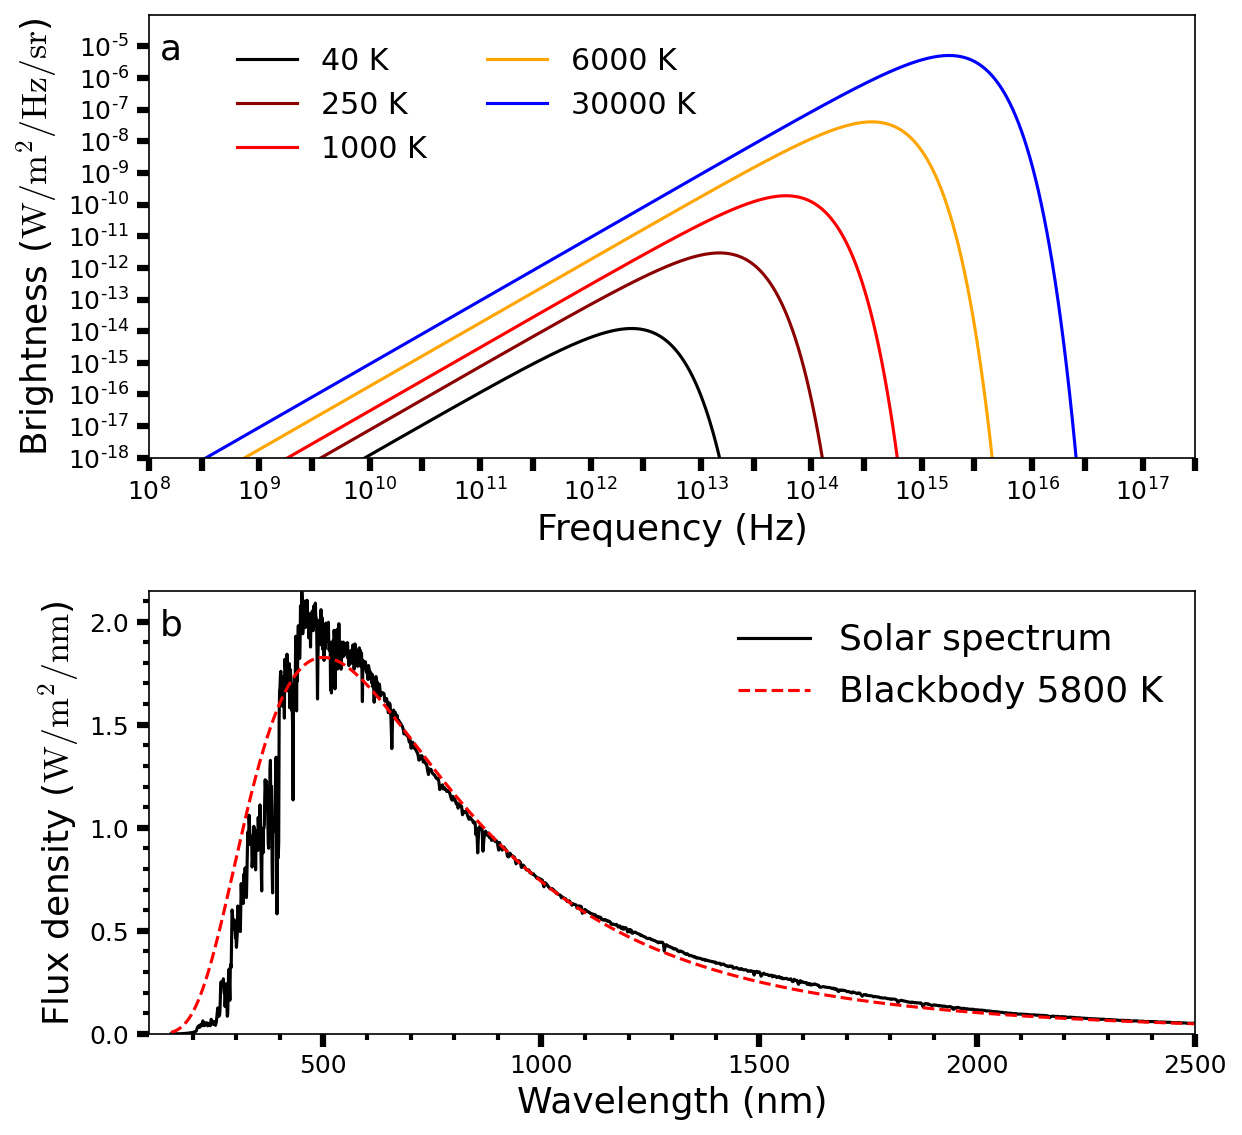

In [1]:
from myst_nb import glue
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.constants import h, c, k
import warnings
warnings.filterwarnings("ignore")

rcParams.update({'font.size': 12})
rcParams.update({'mathtext.fontset': 'cm'})


def Blackbody(lam, T, wave=False):
    # Calculate brightness from Planck's radiation law
    #nu = frequency in Hz
    # T = effective temperature in K
    if wave:
        B = (2*h*c**2/lam**5)/(np.exp(h*c/(lam*k*T))-1)
    else:
        nu = c/lam
        B = (2*h*nu**3/c**2)/(np.exp(h*nu/(k*T))-1)
    return B


# Data taken from  American Society for Testing and Materials (ASTM) developed an air mass zero reference spectrum (ASTM E-490) for use by the aerospace community.
# https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html
solar_irr = np.genfromtxt("solar_spectrum.csv", delimiter=',', comments='#')
solar_irr[:, 0] *= 1000
cut_window = np.where(np.logical_and(
    solar_irr[:, 0] > 150, solar_irr[:, 0] < 2500))[0]
solar_irr[:, 1] /= 1000
solar_irr = solar_irr[cut_window]
T_sun = 5800
Omg = 6.794e-5  # average solid angle of the Sun in sr

fs = 'x-large'

fig = plt.figure(figsize=(9, 9), dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

T_rng = [40, 250, 1000, 6000, 30000]
lam_rng = c/np.logspace(8.5, 17, 1001)
col = ['k', 'darkred', 'r', 'orange', 'blue']
for i in range(0, 5):
    B_nu = Blackbody(lam_rng, T_rng[i], False)
    ax1.loglog(c/lam_rng, B_nu, 'k-',
               color=col[i], lw=1.5, label='%i K' % T_rng[i])

ax1.text(0.01, 0.9, 'a', fontsize=fs, transform=ax1.transAxes)
ax1.set_ylim(1e-18, 1e-4)
ax1.set_xlim(1e8, 1.5e17)
ax1.legend(bbox_to_anchor=(0.55, 0.75), bbox_transform=fig.transFigure,
           ncol=2, fontsize='large', frameon=False)
xticks = []
yticks = [1e-18, 1e-17, 1e-16, 1e-15, ]
for i in range(0, 10):
    ymag = 10**(-14+i)
    xmag = 10**(8+i)
    xticks.append(xmag)
    xticks.append(3*xmag)
    yticks.append(ymag)
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)

ax1.set_xlabel("Frequency (Hz)", fontsize=fs)
ax1.set_ylabel("Brightness ($\\rm W/m^2/Hz/sr$)", fontsize=fs)

ax1.minorticks_on()
ax1.tick_params(which='major', axis='both',
                direction='out', length=6.0, width=3.0)
ax1.tick_params(which='minor', axis='both',
                direction='out', length=3.0, width=1.0)

ax2.plot(solar_irr[:, 0], solar_irr[:, 1],
         'k-', lw=1.5, label='Solar spectrum')
# convert from m-->nm and multiply by solid angle of the solar disk
B_lam = Blackbody(solar_irr[:, 0]*1e-9, T_sun, True)*1e-9*Omg
ax2.plot(solar_irr[:, 0], B_lam, 'r--', lw=1.5, label='Blackbody %i K' % T_sun)

ax2.legend(loc='upper right', fontsize=fs, frameon=False)

ax2.text(0.01, 0.9, 'b', fontsize=fs, transform=ax2.transAxes)
ax2.set_xlim(100, 2500)
ax2.set_ylim(0, 2.15)
ax2.set_ylabel("Flux density ($\\rm W/m^2/nm$)", fontsize=fs)
ax2.set_xlabel("Wavelength (nm)", fontsize=fs)

ax2.minorticks_on()
ax2.tick_params(which='major', axis='both',
                direction='out', length=6.0, width=3.0)
ax2.tick_params(which='minor', axis='both',
                direction='out', length=3.0, width=2.0)

fig.subplots_adjust(hspace=0.3)

glue("blackbody_fig", fig, display=False)


Two limits of Planck's radiation law can be derived:

1. **Rayleigh-Jeans law**: When $$h\nu \ll kT$ (i.e., at longer wavelengths or shorter frequencies that are typical of planetary bodies), then $e^{h\nu/(kT)}-1 \approx h\nu/(kT).  Equation {eq}`Plancks_law` can be approximated by <br> <br>

    ```{math}
    :label: RJ_law
    B_\nu(T) \approx \frac{2\nu^2}{c^2}kT.
    ```

2. **Wien's law**: When $h\nu \gg kT$, Eqn. {eq}`Plancks_law` can be approximated by <br> <br>

    ```{math}
    :label: Wiens_law
    B_\nu(T) \approx \frac{2h\nu^3}{c^2} e^{-h\nu/(kT)}.
    ```

Equations {eq}`RJ_law` and {eq}`Wiens_law` are simpler than Eqn. {eq}`Plancks_law`, and thus can be quite useful in the regimes in which they are applicable.  This also explains why Eqns. {eq}`RJ_law` and {eq}`Wiens_law` were developed first.

The peak frequency $\nu_{\rm max}$ is the frequency at which the maximum brightness $B_\nu(T)$ occurs, where $\nu_{\rm max}$ can be determined by setting the derivative of Eqn. {eq}`Plancks_law` equal to zero (i.e., $\partial B_\nu/\partial \nu = 0$).  The result is known as [Wien's displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law): 

\begin{align}
\nu_{\rm max} = bT,
\end{align}

which depends on the proportionality constant $b_\nu = 5.88 \times 10^{10}\ {\rm Hz/K}$.  The brightness $B_\lambda$ as a function of wavelength $\lambda$ is proportional to $B_\nu$ by a factor $|d\nu/d\lambda|$, or 

\begin{align}
B_\lambda = B_\nu\left|\frac{d\nu}{d\lambda}\right|,
\end{align}

where the blackbody spectral peak in wavelength $\lambda_{\rm max}$ can be found by setting $\partial B_\lambda/\partial \lambda = 0$ to get

```{math}
:label: Wien_law_constant
\lambda_{\rm max} = \frac{b_\lambda}{T},
```

with $b_\lambda = 2.9 \times 10^{-3}\ {\rm m\cdot K}$.

```{note}
The blackbody spectral peak in wavelength is blueward of the brightness peak measured in terms of frequency, $\lambda_{\rm max} = 0.57\ c/\nu_{\rm max}$.
```

The **flux density** $\mathcal{F}_\nu$ (in units of $\rm W/m^2/Hz$) of radiation from an object is given by

\begin{align}
\mathcal{F}_\nu = \Omega_s B_\nu(T),
\end{align}

which requires the solid angle (in $\rm sr$) subtended by the object.  Just above the complete 'surface' of a planet of brightness $B_\nu$, the flux density is equal to

\begin{align}
\mathcal{F}_\nu = \pi B_\nu(T).
\end{align}

The **flux** $\mathcal{F}$ has units of $\rm W/m^2$, which is the flux density integrated over *all* frequencies:

```{math}
:label: SB_law
\mathcal{F} = \int_0^\infty \mathcal{F}_\nu d\nu = \pi \int_0^\infty B_\nu(T) d\nu = \sigma T^4,
```

which is the **Stefan-Boltzmann law** that depends on the [Stefan-Boltzmann constant](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_constant) $\sigma = \frac{2\pi^5k^4}{15h^3c^2}\ {\rm W/m^2/K^4}$ since the [2019 redefinition of SI base units](https://en.wikipedia.org/wiki/2019_redefinition_of_the_SI_base_units).  The total flux that intercepts a surface that is a distance $r$ from a star with a luminosity $\mathcal{L}$ the is defined as

```{math}
:label: flux_surf
\mathcal{F} = \frac{\mathcal{L}}{4\pi r^2}.
```

If the surface is a stellar radius $R$, then the Stefan-Boltzmann law can be written as

\begin{align}
\mathcal{L} = 4\pi \sigma R^2T^4.
\end{align}

### Albedo
Objects in the Solar System reflect part of the energy back into space, which makes them visible to us, while the remaining energy is absorbed.  In principle, the amount of incident radiation that is reflected can be calculated at each frequency.  The energy or flux absorbed by the object determines its temperature.

1. *Monochromatic albedo* $A_\nu$ is the fraction of incident energy that gets reflected (or scattered back) to space at a given frequency of light:
   
   \begin{align*}
   A_\nu = \frac{\text{reflected or scattered light at frequency }\nu}{\text{incident radiation at frequency }\nu}.
    \end{align*}

2. [Bond albedo](https://en.wikipedia.org/wiki/Bond_albedo) $A_B$ (or planetary albedo) is where we integrate this over all frequencies:
   
   \begin{align*}
   A_\nu = \frac{\text{total reflected or scattered light}}{\text{incident radiation}}.
    \end{align*}

A surface of a body in the Solar System scatters the Sun's light, which can be received by a telescope on Earth.  The three angles of relevance are:

- The angle $i$, which locates the incident light ray relative to the normal of the planet's surface (Fig. {numref}`{number}<surface-element-fig>`).
- The angle $\theta$ that locates the reflected ray along $\hat{s}$ and  received at the telescope (Fig. {numref}`{number}<surface-element-fig>`).
- The [phase angle](https://en.wikipedia.org/wiki/Phase_angle_%28astronomy%29) $\phi$ (or angle of reflectance) that locates the Sun and Earth relative to the planet's position in its orbit (Fig. {numref}`{number}<phase-angle-fig>`).

````{panels}
```{figure-md} surface-element-fig
<img src="surface_element.png" alt="surface element"  width="450px">

Sketch of the geometry for a surface element $dA$ with a unit vector $\hat{z}$ that is normal to the surface, the ray $\hat{s}$ is along the line of
sight, and $\hat{s}$ makes an angle $\theta$ with the normal to the surface.  An incident ray approaches at an angle $i$ relative to the normal, which reflects along $\hat{s}$ with a solid angle $d\Omega_s$.
```

---
```{figure-md} phase-angle-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Phase_Angle_3.svg/1280px-Phase_Angle_3.svg.png" alt="phase angle"  width="450px">

Diagram of the phase angle that indicates the relative orbital position of the Sun-object-Earth system.  Image credit: Wikipedia:[phase angle](https://en.wikipedia.org/wiki/Phase_angle_%28astronomy%29).
```
````

In the case of a phase angle, the light can be purely backscattered ($\phi=0^\circ$), forward scattered $(\phi=180^\circ)$, or somewhere in between.  Light is often scattered in a preferred direction that is described by the **scattering phase function**.  For particles similar in size to (or slightly larger than) the wavelength of light (i.e., infrared waves and micron-sized dust grains), the preferred scattering angle is in the forward direction.  For particles *smaller* than the wavelength of light, the scattering is more isotropic (i.e., all directions).

From Earth, all phase angles $(0^\circ < \phi < 180^\circ)$ can only be measured for planets with heliocentric distances less than 1 AU (i.e., Mercury and Venus) and the Moon.  The outer planets are observed from Earth at phase angles close to $0^\circ$.  

For purely backcscattered radiation $(\phi = 0^\circ)$, the [geometric albedo](https://en.wikipedia.org/wiki/Geometric_albedo) $A_g$ (see notes from [David Catling](http://faculty.washington.edu/dcatling/555_PlanetaryAtmos/EnergySourcesOrbits_Student.pdf)) is defined by:

\begin{align}
A_g = \frac{\mathcal{F}(\phi = 0^\circ)}{\mathcal{F}_\odot},
\end{align}

which depends on the flux $\mathcal{F}$ reflected from the body at phase angle $\phi = 0^\circ$ (i.e., $\mathcal{F}(\phi = 0^\circ)$), and the solar constant $\mathcal{F}_\odot$ that is defined as the solar flux received at $r_\oplus = 1\ {\rm AU}$.  The [solar constant](https://en.wikipedia.org/wiki/Solar_constant) is defined in SI units ([Pr&#353;a et al. 2016](https://iopscience.iop.org/article/10.3847/0004-6256/152/2/41)) as

\begin{align}
\mathcal{F}_\odot \equiv \frac{\mathcal{L}_\odot}{4\pi r_\oplus^2} = 1361\ {\rm W/m^2}.
\end{align}

```{note}
[Cahoy, Marley, & Fortney (2010)](https://iopscience.iop.org/article/10.1088/0004-637X/724/1/189) demonstrate the uses of Bond and geometric albedo for exoplanet imaging.
```

### Brightness and Effective Temperatures
The temperature of blackbody can be determined using Planck's radiation law by measuring a small part of the object's radiation curve.  This is usually impractical because most bodies are not *perfect* blackbodies, but exhibit spectral features that complicate temperature measurements.  Instead, it is more common to relate the observed flux density $\mathcal{F}_\nu$ to the **brightness temperature** $T_b$.  The brightness temperature matches the brightness of the body to the same brightness of an ideal black body at a particular frequency (i.e., $T\rightarrow T_b$ in Eqn. {eq}`Plancks_law`).

If the total flux integrated over all frequencies can be determined, then the temperature corresponding to a blackbody emitting the same amount of energy or flux $\mathcal{F}$ is referred to as the **effective temperature** $T_{\rm eff}$:

\begin{align}
T_{\rm eff} \equiv \left(\frac{\mathcal{F}}{\sigma}\right)^{1/4},
\end{align}

using the Stefan-Boltzmann law (Eqn. {eq}`SB_law`).  The wavelength range that is representative for most of an object's radiation can be estimated via Wien's displacement law (Eqn. {eq}`Wien_law_constant`).  For object with temperatures of $150-300\ {\rm K}$ (in the inner Solar System) the wavelengths occur in the mid-infrared $(10-20\ {\rm \mu m})$, while the cooler temperatures of $\sim 40-50\ {\rm K}$ (in the outer Solar System) occur at far-infrared wavelengths $(\sim 60-70\ {\rm \mu m})$.

### Equilibrium Temperature
The **equilibrium temperature** can be calculated once the incoming flux $\mathcal{F}_{\rm in}$ (i.e., solar radiation, or insolation) is in balance with the outgoing flux $\mathcal{F}_{\rm out}$ from the re-radiation.  If a body's temperature is *completely* determined by the incident solar flux, then the equilibrium temperature equals the effective temperature.  Any discrepancies between the effective and equilibrium temperatures contain valuable information on the object.

Jupiter, Saturn, and Neptune exceed the equilibrium temperature, which implies that these bodies possess internal heat sources.  Venus' surface temperature is far hotter than the equilibrium temperature of the planet, which is a consequence of a strong greenhouse effect in its atmosphere.  The effective temperature of Venus is equal to the equilibrium temperature due to domination by radiation from the planet's cool upper atmosphere.  This implies that Venus has a negligible heat source.

The sunlit hemisphere of a (spherical) body of radius $R$ receives solar radiation in the amount of:

```{math}
:label: ASR
\mathcal{P}_{\rm in} = \left(1-A_B\right)\frac{\pi R^2 \mathcal{L}}{4\pi r^2} = \left(1-A_B\right)\mathcal{F}\left(\pi R^2\right),
```

which depends on the Bond albedo $A_B$, the cross-sectional area $(\pi R^2)$ of the planet intercepting the solar energy, and the flux intercepted at the planet's orbital distance $r$.  Equation {eq}`ASR` is also called the absorbed shortwave radiation ([ASR](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/zero-dim-ebm.html#absorbed-shortwave-radiation-asr-and-planetary-albedo)).

A rapidly rotating planet re-radiates energy (outgoing longwave radiation ([OLR](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/zero-dim-ebm.html#recap-of-our-simple-greenhouse-model))) from its entire surface (with a surface area of $4\pi R^2$) to get

```{math}
:label: OLR
\mathcal{P}_{\rm out} = \epsilon_\lambda \mathcal{L} = \epsilon_\lambda 4\pi R^2 \sigma T^4.
```

```{note}
The incoming solar radiation (**ASR**) is primarily at optical (**short**) wavelengths, and thermal emission (**OLR**) from planets is radiated **out**ward primarily at infrared (**long**) wavelengths.
```

The emissivity $\epsilon_\lambda$ depends on the outgoing wavelength and the size of the object.  For objects that are large compared to the wavelength in infrared, $\epsilon \sim 0.9$, where it can differ substantially from unity at radio wavelengths.  Objects much smaller than the wavelength $(R\leq \lambda/10)$ do not radiate efficiently, where $\epsilon_\lambda < 1$.

For equilibrium, there must be a balance between the incoming insolation and the outgoing radiation (i.e., $\mathcal{P}_{\rm in} = \mathcal{P}_{\rm out}$).  Then the equilibrium temperature can be estimated by

```{math}
:label: T_eq
T_{\rm eq} &= \left( \frac{(1-A_B)\mathcal{F}}{4\epsilon_\lambda \sigma} \right)^{1/4}, \\[5pt]
&= \left( \frac{(1-A_B)\mathcal{L}}{16\pi r^2 \epsilon_\lambda \sigma} \right)^{1/4}.
```

The disk-averaged equilibrium temperature (Eqn. {eq}`T_eq`) gives useful information on the temperature $\sim 1$ meter below a planetary surface.  If $\epsilon_\lambda \sim 1$, it corresponds well with the actual (physical) temperature of the subsurface layers where diurnal (i.e., day/night) and seasonal temperature variations are important.  These layers can be probed at radio wavelengths, and the observed brightness temperature at long wavelengths can be compared directly with the equilibrium temperature.

The latitudinal and longitudinal effects of the insolation pattern were omitted in the derivation of Eqn. {eq}`T_eq`, where these effects depend on the planet's rotation rate, obliquity, and orbit.  Latitudinal and longitudinal effects are large on airless planets that rotate slowly, have small obliquities, and/or travel on very eccentric orbits about the Sun.

## Radiation
The transport of heat in a planetary atmosphere is typically dominated by radiation in a planet's upper atmosphere and stratosphere.  The radiation efficiency depends *critically* on the (photon) emission and absorption properties of the atmospheric gas.  Atomic structure and energy transitions in atoms and molecules largely define the radiation efficiency.  The equations of radiative transfer also depend on some concepts from physics (e.g., specific intensity, flux density, and mean intensity).

### Photons and Energy Levels in Atoms
The energy $E$ and momentum $p$ of a photon are given by

```{math}
:label: energy_mom
E &= h\nu, \\
E &= pc,
```

which depend on Planck's constant $h$, the speed of light $c$, and the frequency of light $\nu$.  The momentum is actually a vector quantity that travels along a unit vector $\hat{s}$ along the direction of propagation (Fig. {numref}`{number}<surface-element-fig>`).

Emission and absorption of photons by atoms or molecules occur by a change in the *energy state*.  Each atom consists of a nucleus surrounded by a 'cloud' of electrons, but Bohr's semiclassical theory simplifies this picture.  In Bohr's model of hydrogen, the electron orbits the nucleus, such that the centrifugal force is balanced by the Coulomb force:

\begin{align}
\frac{m_e v^2}{r} = \frac{Zq^2}{4\pi \epsilon_o r^2}.
\end{align}

These forces depend on the mass $m_e$, velocity $v$, and charge $q$ of the electron, as well as the radius $r$ of the electron's orbit (assumed to be circular) and a fundamental constant $\epsilon_o$ that mediates the electrostatic force.  The atomic number $Z$ is included so that the relation can be generalized later, where $Z=1$ for hydrogen.  Electrons are in orbits, where the angular momentum is quantized, or

```{math}
:label: quant_ang_mom
m_e vr_n = n\hbar,
```

depending on the **principal quantum number** (integer) $n$ and 'hbar' $\hbar$, which is a form of Planck's constant (i.e., $\hbar=h/(2\pi)$).  The radius $r$ in Eqn. {eq}`quant_ang_mom` can be written in terms of fundamental constants as

```{math}
:label: Bohr_rn
r_n = \frac{n^2 4\pi \epsilon_o \hbar^2}{m_e Zq^2}.
```

The radius of the lowest energy state ($n=1$) for the hydrogen atom is called the **Bohr radius**:

\begin{align}
r_1 = \frac{\hbar^2}{m_e q^2} \approx 5.3 \times 10^{-11}\ {\rm m}.
\end{align}

The energy $E_n$ is quantized, which can be determined through the kinetic and potential (Coulomb) energy as

\begin{align}
E_n &= \frac{1}{2}m_e v^2 - \frac{Zq^2}{4\pi \epsilon_o r}, \\[5pt]
    &= \frac{Zq^2}{4\pi \epsilon_o r} - \frac{Zq^2}{4\pi \epsilon_o r}, \\[5pt]
    &= - \frac{Zq^2}{8\pi \epsilon_o r}.
\end{align}

The quantized radius (Eqn. {eq}`Bohr_rn`) for hydrogen can be substituted to get

\begin{align}
E_n = - \frac{E_o}{n^2},
\end{align}

in terms of the ground-state energy $E_o$, which is $13.6\ {\rm eV}$ for hydrogen (see [here](https://saturnaxis.github.io/ModernPhysics/Chapter_4/structure-of-the-atom.html#the-bohr-model-of-the-hydrogen-atom) for a more detailed derivation).  Figure {numref}`{number}<hydrogen-transitions-fig>` illustrates the transitions between energy levels for the hydrogen atom.

```{figure-md} hydrogen-transitions-fig
<img src="https://openstax.org/apps/archive/20220509.174553/resources/212c7b075f85474cb8e5b02c8e899c1af8619d89" alt="energy levels"  width="500px">

The energy spectrum of the hydrogen atom. Energy levels (horizontal lines) represent the bound states of an electron in the atom. There is only one ground state, $n=1$, and infinite quantized excited states. The states are enumerated by the quantum number $n=1,\ 2,\ 3,\ 4,\ \ldots$ Vertical lines illustrate the allowed electron transitions between the states. Downward arrows illustrate transitions with an emission of a photon with a wavelength in the indicated spectral band.  Image credit: OpenStax:[University Physis Vol 3](https://openstax.org/books/university-physics-volume-3/pages/6-4-bohrs-model-of-the-hydrogen-atom).
```

The transitions between a given state (e.g., $n=1,\ 2,\, 3$) and higher levels in a hydrogen atom are named after the scientist that discovered the series within an emission spectrum.  The **Lyman series** corresponds to transitions from $n=1$, while the **Balmer** and **Paschen** series correspond to transitions from $n=2$ and $n=3$, respectively.  The individual transitions within a series are delineated using the Greek alphabet (e.g., $\alpha$, $\beta$, $\gamma$, etc.).  For example, the transition between $n=1$ to $n=2$ produce the $\rm Ly\ \alpha$ spectral line, where the transition from $n=1$ to $n=3$ produces the $\rm Ly\ \beta$ line.  If the electron is unbound, then the atom is **ionized**.  To ionize hydrogen with an electron in the ground state, an incoming photon must supply an energy $\geq 13.6\ {\rm eV}$ ($1\ {\rm eV} = 1.6 \times 10^{-19}\ {\rm J}$).  Photons with the requisite energy have wavelengths shorter than $91.2\ {\rm nm}$ (i.e., the **Lyman limit**).

```{note}
The energy levels of molecules are more numerous than those of isolated atoms because rotation and vibration of the individual atoms also requires energy.  This multiplicity leads to numerous molecular lines.
```

Transitions between energy levels may result in the *absorption* or *emission* of a photon with an energy $\Delta E$ that corresponds to exactly the difference in energy between two levels.  The energy difference between electron orbits (and the frequency of the photon associated with the transition) decrease with increasing $n$.  Electronic transitions to or from the ground state $(n=1)$ may be observed at ultraviolet (UV) or optical wavelengths.  Other transitions (e.g., high $n$, (hyper)fine structure in atomic spectra, and molecular rotation/vibration) occur at infrared (IR) or radio wavelengths because the spacing between energy levels is much smaller (i.e., $\Delta E \propto 1/\lambda$).  Each atom or molecule has its own unique set of energy transitions, which allows scientists to use measurements of absorption/emission spectra to identify particular species in an atmosphere or surface.

### Spectroscopy
Spectroscopy uses the dispersion of light as a function of wavelength to identify the composition of various materials.  We distinguish among three types of spectra, which represent [Kirchoff's laws of radiation](https://en.wikipedia.org/wiki/Gustav_Kirchhoff#Kirchhoff's_three_laws_of_spectroscopy):

1. A solid, liquid, or dense gas excited to emit light will radiate at all wavelengths and thus produce a **continuous** spectrum (Fig. {numref}`{number}<kirchhoff-laws-fig>` middle).
2. If light composing a continuous spectrum passes through a cool, low-density gas, the result will be an **absorption** spectrum (Fig. {numref}`{number}<kirchhoff-laws-fig>` left).  The gas lies between the observer and the light source.
3. A low-density gas excited to emit light will do so at specific wavelengths and this produces an **emission** spectrum (Fig. {numref}`{number}<kirchhoff-laws-fig>` right).  The observer is not typically along the line-of-sight of the gas and the light source.

```{figure-md} kirchhoff-laws-fig
<img src="https://www.e-education.psu.edu/astro801/sites/www.e-education.psu.edu.astro801/files/image/kirchoffs_laws_KL.jpg" alt="Kirchhoffs laws"  width="600px">

The three conditions that give rise to the three Kirchoff's laws for the creation of a continuous (left), absorption (middle), and emission spectrum (right).  Image credit: [Penn State Astronomy & Astrophysics](https://www.e-education.psu.edu/astro801/content/l3_p6.html).
```

For material in **thermodynamic equilibrium** with the radiation field, the amount of energy emitted via thermal excitation $j_\nu$ must equal the energy absorbed through

```{math}
:label: Kirchhoff_law
j_\nu = \kappa_\nu B_\nu(T),
```

which depends on Planck's function $B_\nu(T)$ and the mass absorption coefficient $\kappa_\nu$.

#### Spectra
In astrophysics, absorption lines occur when atoms or molecules absorb photons (at a particular frequency) from a beam of radiation.  Emission lines arise from gas clouds heated by a background source (e.g., Pleiades).  The center of the absorption line at a frequency $\nu_o$ has a flux $\mathcal{F}_{\nu_o}$ that is less than the flux $\mathcal{F}_c$ from the background continuum level (see the example line profile in Fig. {numref}`{number}<line-profile-fig>`).  For planets, we see atomic and molecular absorption both in reflected sunlight (at UV, visible, and near-IR wavelengths) and in thermal emission (at IR and radio wavelengths) spectra, as shown in the Earth spectra in Fig. {numref}`{number}<Earth-spectra-fig>`.

````{tab} Example Line Profile

```{figure-md} line-profile-fig
<img src="line_profile.png" alt="line profile"  width="600px">

Schematic of an absorption line profile, where the flux varies with the frequency of light.  The absorption depth $A_\nu$ corresponds to the chemical concentration within a material at a frequency $\nu_o$.  The flux continuum level $\mathcal{F}_c$ measures the intensity given by a continuous spectrum, while the center of the absorption has a flux density $\mathcal{F}_{\nu_o}$.
```
````

````{tab} Earth Spectra
```{figure-md} Earth-spectra-fig
<img src="https://i0.wp.com/sitn.hms.harvard.edu/wp-content/uploads/2012/01/fig3.png" alt="Earth spectra"  width="700px">

The transmission spectra for Earth in the visible $(0.38-0.76\ {\rm \mu m})$, near-IR $(0.76-2.5\ {\rm \mu m})$, and IR $(2.5-20\ {\rm \mu m})$ showing some of the biomarkers in each region.  Image credit: [Kaltenegger & Traub (2009)](https://iopscience.iop.org/article/10.1088/0004-637X/698/1/519#apj300679f3).
```
````

Planets, moons, asteroids, and comets are visible because sunlight reflects off their surfaces, cloud layers, or atmospheric layers.  Sunlight itself displays a large number of absorption lines (i.e., the **Fraunhofer absorption spectrum**) because atoms in the solar photosphere (i.e., outer layer of its atmosphere) absorb part of the sunlight coming from the deeper, *hotter* layers.  If all the sunlight hitting a planetary surface is reflected back into space the planet's spectrum is shaped like the solar spectrum (apart from a Doppler shift induced from the planet's motion).

Atoms and molecules in a planet's atmosphere or surface may absorb *some* of the Sun's light at specific frequencies and can introduce additional absorption lines in the planet's observed spectrum.  For example, Uranus and Neptune are greenish-blue because methane gas (within their atmospheres) absorbs in the red part of the visible spectrum, so the sunlight reflected back into space is primarily bluish.

The temperature decreases with altitude in the Sun's photosphere, and the Fraunhofer absorption lines are visible as a decrease in the line intensity.  Most of the thermal emission from a planetary atmosphere comes from deeper warmer layers, and some of these photons may be absorbed by gases in the outer layers.  Spectral lines formed in a planet's troposphere (lower atmosphere) are also visible as absorption profiles.  Lines formed in a planet's stratosphere are visible as *emission* profiles.

The cause of this difference is due to the **optical depth** $\tau_\nu$, which is defined as the integral of the mass extinction coefficient $\alpha_\nu$ along the line of sight $s$ as

```{math}
:label: optical_depth
\tau_\nu \equiv \int_{s_1}^{s_2} \alpha_\nu(s) \rho(s)\ ds.
```

In a spectrum of a planet's atmosphere, the optical depth at the center of the line is always largest.  The line profile of a plant's thermal emission spectrum reveals that temperature and pressure at the altitudes probed.  

- In the troposphere (temperature decreases with altitude), lines are seen as an absorption against the warm continuum background.
- In the tropopause, the line is seen in emission against the cooler background.

Astrophysics speaks in terms of emission or absorption lines, where in atmospheric science, the lines are described relative to the continuum as **in emission** $(\mathcal{F}_{\nu_o}>\mathcal{F}_c)$ or **in absorption** $(\mathcal{F}_{\nu_o}<\mathcal{F}_c)$ depending on whether the temperature is increasing or decreasing with altitude in the region of line formation.

For large objects that are well resolved (e.g., the Sun, planets, and some  satellites), a gradual (or sometimes abrupt) decrease in the intensity of light can be measured that changes with distance from the center of the object to the limb (i.e., edge) called **limb darkening**.  The inverse effect (i.e., a gradual brightening) is called **limb brightening**.

If we observe the thermal emission from a giant planet, this effect can be explained using the temperature profile of the atmosphere and the optical depth.  If the temperature is decreasing with altitude, we see limb darkening because of the greater path length through the cooler outer portion of the atmosphere near a planet's limb compared to its center.  If the temperature increases with altitude, then we see limb brightening instead.

While the Sun demonstrates limb darkening, an example of limb brightening appears in the near-IR $(1-2\ {\rm \mu m})$ images of Titan.  At these wavelengths, the satellite is seen in reflected sunlight.  Haze layers in the atmosphere cause limb brightening because the haze optical depth *increases* towards the limb.  


#### Doppler Shift and Line Broadening
Photons are emitted or absorbed in response to the excitation or de-excitation of electrons between energy levels, where the difference between energy levels $\Delta E$ determines to the specific frequency of the photons.  According to the **Heisenberg uncertainty principle**, a photon can be absorbed/emitted with an energy slightly different from $\Delta E$, which results in a finite width for the observed spectral line profile $\Phi_\nu$.  This quantum mechanical effect is one type of line broadening called **natural broadening**.

The frequency of the object's emission and absorption lines is Doppler shifted $\Delta \nu$ depending on the velocity $v_r$ of the object along the line of sight by 

\begin{align}
\Delta \nu = \frac{v_r}{c} \nu.
\end{align}

A positive **Doppler shift** occurs if the object moves towards the observer (*blue shifted*) and negative if the object moves away from the observer (*red shifted*).  This phenomenon has bee used to determine the rotation rate of Mercury using radar techniques.  upon transmitting a radar pulse at a specific frequency, the signal is blue shifted by the approaching limb and red shifted by the receding limb.  These Doppler shifts broaden the radar signal upon reflection by an amount proportional to the planet's rotation rate.

In an atmosphere, the motion of atoms and molecules occur in all directions, which broadens the line profile more than the natural line profile.  This is called **Doppler broadening**.

In a dense gas, collisions between particles perturb the energy levels of the electrons such that photons with a slightly lower or higher frequency can cause excitation/de-excitation.  This also lead to a broadening of the line profile called **pressure broadening**.  Pressure broadened profiles tend to be broader than Doppler broadened profiles.  The detailed shape of a line profile is determined by the chemical abundance producing the lines, as well as the pressure and temperature of the environment.

### Radiative Energy Transport
The equations of radiative energy transport govern the temperature-pressure profile when the absorption and re-emission of photons dominates.  The change in intensity $dI_\nu$ within a gas cloud is equal to the net emission and absorption by

```{math}
:label: spec_I
dI_\nu = \left(j_\nu - I_\nu \alpha_\nu\right) \rho\ ds,
```

which depends on the specific intensity $I_\nu$ (in units of $\rm W/m^2/Hz/sr$) and the density $\rho$ of the gas along a distance $ds$.  The *emission coefficient* $j_\nu$ includes both the effects of scattering and thermal excitation, where the *mass extinction coefficient* $\alpha_\nu$ has components of mass absorption $\kappa_\nu$ and scattering $\sigma_\nu$ (i.e., $\alpha_\nu = \kappa_\nu + \sigma_\nu$).

```{note}
Some other texts will use $\kappa_\nu$ to denote the mass extinction coefficient, assuming that it largely dominates over the contribution due to scattering (i.e., $\kappa_\nu \gg \sigma_\nu$ and $\alpha_\nu \approx \kappa_\nu$)
```

The specific intensity is the energy radiated by a blackbody at a frequency $\nu$ or

\begin{align}
I_\nu = B_\nu (T).
\end{align}

This intensity is emitted into a solid angle $d\Omega_s$ (see Fig. {numref}`{number}<surface-element-fig>`).  The solid angle (in $\rm sr$) is defined by the integration over a sphere of unit radius as

\begin{align}
\oint d\Omega_s = \int_0^{2\pi} \int_0^\pi \sin \theta d\theta d\phi = 4\pi.
\end{align}

The **mean intensity** $J_\nu$ of the radiation is equal to 

\begin{align}
J_\nu \equiv \frac{\oint I_\nu d\Omega_s}{\oint d\Omega_s} = \frac{1}{2} \int_{-1}^1 I_\nu d\cos \theta.
\end{align}

The angle $\theta$ is shown in Fig. {numref}`{number}<surface-element-fig>`, which represents the angle between the line of sight vector $\hat{s}$ and $\hat{z}$.  Then the differential $ds = dz/\cos \theta$ and Eqn. {eq}`spec_I` can be rewritten as

```{math}
:label: spec_I_los
\frac{\cos \theta}{\rho} \frac{dI_\nu}{dz} = j_\nu - \alpha_\nu I_\nu.
```

The definition of optical depth (Eqn. {eq}`optical_depth`) can be written as $d\tau_\nu = \alpha_\nu \rho dz$, where Eqn. {eq}`spec_I_los` becomes

\begin{align}
\alpha_\nu \cos \theta \frac{dI_\nu}{d\tau_\nu } = j_\nu - \alpha_\nu I_\nu.
\end{align}

The **source function** $S_\nu$ is defined as $S_\nu \equiv j_\nu/\alpha_nu$, where the general equation of radiative transport is

```{math}
:label: gen_rad_trans
\cos \theta \frac{dI_\nu}{d\tau_\nu } = S_\nu - I_\nu.
```
In the [special case of blackbody radiation](https://saturnaxis.github.io/ModernAstro/Chapter_9/stellar-atmospheres.html#the-special-case-of-blackbody-radiation), the solution to Eqn. {eq}`gen_rad_trans` is

```{math}
:label: bbody_transfer
I_\nu(\tau_\nu) = I_\nu(0)e^{-\tau_\nu} + S_\nu \left(1-e^{-\tau_\nu}\right),
```

where the background radiation $I_\nu(0)$ is attenuated when propagating through the absorbing medium.

```{note}
In radiative transfer calculations of planetary atmospheres, the optical depth is zero starting from the top of the atmosphere and increases as one moves towards the planet's surface.
```

Four 'classic' cases of radiative transfer are:

1. Consider a cloud of gas along the line of sight and assume that the cloud itself does not emit radiation (i.e., $j_\nu = S_\nu = 0$).  Suppose that there is a source of radiation behind the cloud.  The incident light $I_\nu(0)$ is reduced in intensity according to Eqn. {eq}`bbody_transfer`, and the observed intensity is <br><br>

    ```{math}
    :label: Lamb_ea_law
    I_\nu(\tau_\nu) = I_\nu(0)e^{-\tau_\nu},
    ```

    and is called **Lambert's exponential absorption law**.  
    - If the gas cloud is optically thin $(\tau_\nu \ll 1)$, Eqn. {eq}`Lamb_ea_law` can be approximated by: $I_\nu(\tau_\nu) = I_\nu(0)(1-\tau_\nu)$. 
    - For very small $\tau_\nu$, $I_\nu(\tau_\nu) \rightarrow I_\nu(0)$, where the radiation intensity is defined by the incident radiation.
    - If the cloud is optically thick $(\tau_\nu \gg 1)$, the radiation is reduced to near zero.
2. If the material in the cloud is in [local thermodynamic equilibrium](https://saturnaxis.github.io/ModernAstro/Chapter_9/stellar-atmospheres.html#temperature-and-local-thermodynamic-equilibrium) (LTE), the radiation field obeys: <br><br>

    \begin{align}
    I_\nu = J_\nu = B_\nu(T).
    \end{align}

    If there is no scattering (i.e., $\sigma_\nu = 0$), then $\kappa_\nu = \alpha_nu$.  The material is in equilibrium with the radiation field, the amount of energy emitted must be equal to the amount of energy absorbed.  The source function is given by $S_\nu = B_\nu(T)$.
3. Assume that $j_\nu$ is due to scattering only (i.e., $j_\nu = \sigma_\nu I_\nu$), where we receive sunlight that is reflected towards us.  In general, scattering removes radiation from a particular direction and redirects (or introduces) it into another direction.  If photons undergo only one encounter with a particle, the process is called **single scattering** and multiple encounters produces multiple scattering.  The **single scattering albedo** $\varpi_\nu$ represents the fraction of radiation lost due to scattering by <br><br>

    \begin{align}
    \varpi_\nu \equiv \frac{\sigma_\nu}{\alpha_\nu}.
    \end{align}

    The single scattering albedo is equal to unity if the mass absorption coefficient $\kappa_\nu$ is equal to zero and $S_\nu = \varpi I_\nu = I_\nu.$
4. For LTE $(I_\nu = J_\nu)$ and isotropic scattering, the fraction of radiation that is absorbed by the medium is given by $\kappa_\nu/\alpha_\nu = 1 - \varpi_\nu.$  Using Kirchoff's law (Eqn. {eq}`Kirchhoff_law`), we can write the source function as <br><br>
   
    \begin{align}
    S_\nu = \varpi_\nu J_\nu + (1-\varpi_\nu)B_\nu(T).
    \end{align}    

### Radiative Equilibrium
Energy transport in a planet's stratosphere is usually dominated by radiation.  If the total flux $\mathcal{F}$ is independent of height $z$, the atmosphere is in **radiative equilibrium**, or

\begin{align}
\frac{d\mathcal{F}}{dz} = 0.
\end{align}

If an atmosphere is in hydrostatic (and radiative) equilibrium and its equation of station is given by the ideal gas law, then its temperature-pressure relation can be written as

```{math}
:label: temp_press_relation
\frac{dT}{dP} \approx -\frac{3T \alpha_{\rm R}}{16 g_{\rm p}} \left(\frac{T_e}{T}\right)^4,
```

which depends on the mean absorption coefficient $\alpha_{\rm R}$ and the local acceleration due to gravity $g_{\rm p}$ of the planet (see Sect. {numref}`{number}<hydro_sect>`).  

Both $T$ and $B_\nu(T)$ vary with depth in a planetary atmospheres, as well as the abundances of many absorbing gases.  The best approach to solving for the temperature structure is to solve the transport equation (Eqn. {eq}`gen_rad_trans`) at all frequencies with the requirement that the flux $\mathcal{F}$ is constant with depth.


## Greenhouse Effect
A planet's surface temperature can be substantially raised above its equilibrium temperature, if the planet has an optically thick atmosphere at infrared wavelengths.  This condition is called the **greenhouse effect**.  The Sun's radiation peaks in intensity within optical wavelengths, where its light enters an atmosphere that is relatively transparent (i.e., optically thin) at at visible wavelengths and heats the surface.  The warm surface radiates its heat at infrared wavelengths.  This radiation is absorbed by molecules in the air (especially the $\rm CH_4$, $\rm H_2O$, and $\rm CO_2$).  Infrared photons are emitted in a random direction when these molecule de-excite.  The net effect is that the atmospheric (and surface) temperature increases until an equilibrium is reached between the input from solar energy and the planetary flux escaping into space.  The greenhouse effect raises the (near) surface temperature of Earth, Venus, and Titan, where Mars' surface temperature remains low.

The calculation for a temperature profile of an actual planetary atmosphere must include the energy absorbed from incident light and the emitted thermal flux.  When averaged globally the solar energy is broken into these groups:

- Almost 25% of the Sun's radiation that intercepts the top of Earth's atmosphere is absorbed by the atmosphere.
- 50% of the Sun's radiation is absorbed at the surface.
- Almost 33% of the Sun's radiation is reflected back to space without being absorbed.

The optical depth of Earth's atmosphere (and those of other planets) is far larger to thermal (IR) radiation than it is to visible (optical) wavelengths. 

### Quantitative Results
The temperature in an atmosphere (at an optical depth $\tau$) can be calculated from its temperature at the top of the atmosphere $T_o$ and the measured $\tau$ by

```{math}
:label: atmos_temp
T = T_o\left(1+\frac{3}{2}\tau \right)^{1/4},
```

where the effective temperature $T_{\rm e}$ is related to $T_o$ through

```{math}
:label: eff_temp
T_{\rm e} = 2^{1/4} T_o.
```

The temperature profile in an *idealized gray* atmosphere with a top of the atmosphere temperature $T_o = 200\ {\rm K}$ is shown in Fig. {numref}`{number}<optical-depth>`.  If the temperature of a body is exclusively determined by the incident flux, then the effective temperature is equal to the equilibrium temperature (i.e., $T_{\rm e} = T_{\rm eq}$).  At the top of the atmosphere (i.e., $\tau = 0$), the temperature $T_o = 0.5^{1/4}T_{\rm e}$.


```{glue:figure} optical_depth_fig
:figwidth: 600px
:name: "optical-depth"

Temperature profile (as a function of optical depth $\tau$) in an idealized gray atmosphere, where the temperature at the top of the atmosphere $T_o = 200\ {\rm K}$ (blue line).  The effective temperature $T_{\rm e}$ occurs at an optical depth $\tau = 2/3$.  The temperature just above the surface is determined assuming that the optical depth at the ground $\tau_g = 100$.  By substituting $\tau = 2/3$ into Eqn. {eq}`atmos_temp`, we see that Eqn. {eq}`atmos_temp` reduces to Eqn. {eq}`eff_temp`.  Thus continuum radiation is received from an effective depth within the atmosphere, where $\tau = 2/3$.
```

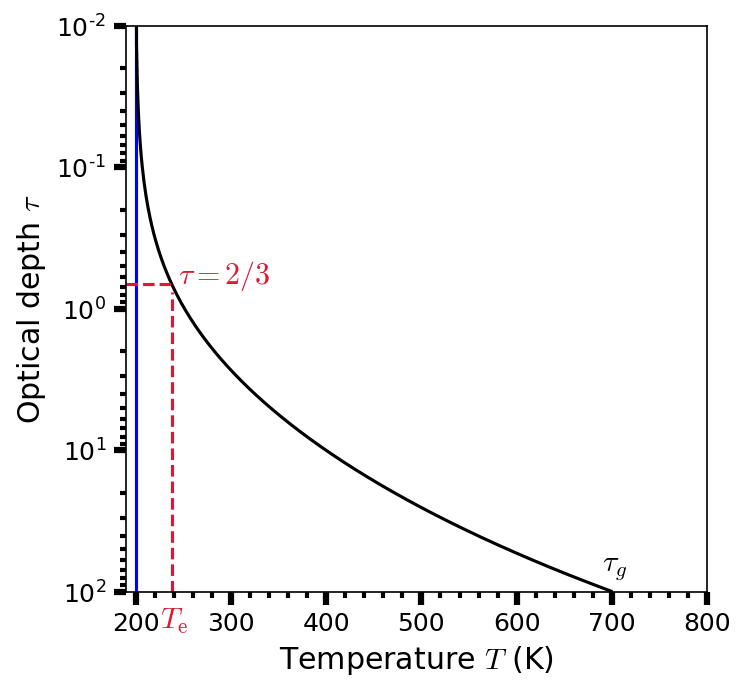

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 12})
rcParams.update({'mathtext.fontset': 'cm'})


def optical_depth(T_o, T):
    # Calculate the optical depth in an atmosphere for a given temperature (in K)
    # T_o = top-of-atmosphere temperature (in K)
    # T = temperature (in K)
    return (2./3.)*((T/T_o)**4 - 1)


T_o = 200  # top of atmosphere temperature (in K)
T_rng = np.arange(T_o, 700, 1)

fs = 'large'
col = (218/256., 26/256., 50/256.)

fig = plt.figure(figsize=(5, 5), dpi=150)
ax = fig.add_subplot(111)

ax.axvline(T_o, color='b', lw=1.5)

tau = optical_depth(T_o, T_rng)
ax.plot(T_rng, tau, 'k-', lw=1.5)


T_e = 2**0.25*T_o
ax.axvline(T_e, 0., 0.53, linestyle='--', color=col, lw=1.5)
ax.axhline(2./3., 0, (23.8-19)/61., linestyle='--', color=col, lw=1.5)
ax.text(245, 2./3., '$\\tau = 2/3$', fontsize=fs, color=col)
ax.text(690, 70, '$\\tau_g$', fontsize=fs, color='k')
ax.text(240, 180, '$T_{\\rm e}$', fontsize=fs,
        color=col, horizontalalignment='center')

ax.set_xlabel("Temperature $T$ (K)", fontsize=fs)
ax.set_ylabel("Optical depth $\\tau$", fontsize=fs)

ax.set_xlim(190, 800)
ax.set_xticks(np.arange(200, 900, 100))
ax.set_ylim(100, 0.01)
ax.set_yscale('log')

ax.minorticks_on()
ax.tick_params(which='major', axis='both',
               direction='out', length=6.0, width=3.0)
ax.tick_params(which='minor', axis='both',
               direction='out', length=3.0, width=2.0)

glue("optical_depth_fig", fig, display=False);

The air temperature just above the ground $T_g$ has an optical depth $\tau_g$, where this temperature can be computed by adding a radiative downward contribution from the top of the atmosphere (with a temperature $T_o$) and the radiative upward contribution from the surface (with a temperature $T(\tau_g)$) to get

\begin{align}
T_g = (T^4(\tau_g) + T_o^4)^{1/4},
\end{align}

where Eqns. {eq}`atmos_temp` and {eq}`eff_temp` can be substituted to get 

```{math}
:label: surface_greenhouse
T_g &= \left(T_o^4 \left[1 + \frac{3}{2}\tau_g \right) + T_o^4\right]^{1/4}, \\
&= \left[T_o^4 \left(2 + \frac{3}{2}\tau_g \right) \right]^{1/4}, \\
&= T_{\rm e} \left(1 + \frac{3}{4}\tau_g \right)^{1/4}.
```

The surface temperature in a radiative atmosphere can be very high if the IR opacity is also high (see more details [here](https://www.lpl.arizona.edu/~griffith/ATMOS15/Lec9-runawayGH.pdf)).

The greenhouse effect is particularly strong on Venus, where the surface temperature reaches $733\ {\rm K}$.  This is almost $500\ {\rm K}$ above the equilibrium temperature of ${\sim}240\ {\rm K}$.  The greenhouse effect is also noticeable on Titan and Earth (an increase of $21\ {\rm K}$ and $33\ {\rm K}$, respectively), while the temperature is raised by only ${\sim}6\ {\rm K}$ on Mars.

The greenhouse arming on Titan is partially compensated by cooling produced by small haze particles in the stratosphere that block short-wavelength sunlight, but are transparent to long-wavelength thermal radiation from Titan (i.e., the **anti-greenhouse effect**).  Similar effects are observed on Earth after giant volcanic eruptions (e.g., 1991 explosion of Mt Pinatubo in the Philippines), which inject huge amounts of ash into the stratosphere.

Icy material allows sunlight to penetrate several centimeters (or more) below the surface but is mostly opaque to re-radiated thermal IR emission.  The subsurface region can become significantly warmer than the equilibrium temperature would indicate.  This process is called the **solid-state greenhouse effect** and is analogous with the atmospheric trapping of thermal IR emission.

The subsurface Lake Untersee in Antarctica is maintained by a special case of the solid-state greenhouse effect known as the ice-covered greenhouse effect.  The ice-covered greenhouse effect may induce habitable liquid water environments just below the surface of a body that is too cold (and/or does not have sufficient atmospheric pressure) to have liquid water on its surface.

### Thermal Profile Derived
The temperature structure in an atmosphere in radiative equilibrium stems from the [diffusion equation](https://en.wikipedia.org/wiki/Diffusion_equation), an expression for a time-dependent flow through space.  In the context of planetary atmosphere, radiation flows through a 1D slab of gas (i.e., atmosphere) as a function of altitude $z$.  The diffusion equation in an optically thick atmosphere (that is approximately in LTE) is given by 

- $I_\nu \approx S_\nu \approx B_\nu(T)$, and
- assumed to be in radiative equilibrium, $d\mathcal{F}_\nu/dz = 0$.
  
The general equation of radiative transport (Eqn. {eq}`gen_rad_trans`) can be integrated over a sphere by using the relations between the [specific radiative flux](https://saturnaxis.github.io/ModernAstro/Chapter_9/stellar-atmospheres.html#the-specific-radiative-flux) and [mean intensity](https://saturnaxis.github.io/ModernAstro/Chapter_9/stellar-atmospheres.html#the-specific-and-mean-intensities)

```{math}
:label: therm_trans
\frac{d}{d\tau_\nu} \int I_\nu \cos \theta d\Omega &= S_\nu \int d\Omega - \int I_\nu d\Omega, \\
\frac{d\mathcal{F}_\nu}{d\tau_\nu} &= 4\pi \left(B_\nu - J_\nu \right).
```

Another relation can be obtain by first multiplying by $\cos \theta$ and then integrating over a sphere to get

```{math}
:label: rad_flux
\frac{d}{d\tau_\nu} \int I_\nu \cos^2 \theta d\Omega &= S_\nu \int \cos \theta d\Omega - \int I_\nu  \cos \theta d\Omega, \\
\frac{dJ_\nu}{d\tau_\nu} \int \cos^2 \theta \sin \theta d\theta d\phi &= 0 - \mathcal{F}_\nu, \\
\frac{4\pi}{3}\frac{dJ_\nu}{d\tau_\nu} &= - \mathcal{F}_\nu,
```

using an table of integrals or [wolfram alpha](https://www.wolframalpha.com/input?i=int+cos%5E2%28x%29sin%28x%29+from+0+to+pi).

For a constant flux with respect to optical depth (i.e., LTE), $d\mathcal{F}_\nu/d\tau_\nu = 0$.  Taking the derivative with respect to optical depth for the results in Eqn. {eq}`therm_trans` and using the results of Eqn. {eq}`rad_flux`, we get

```{math}
:label: bright_tau
0 &= \frac{dB_\nu}{d\tau_\nu} - \frac{dJ_\nu}{d\tau_\nu}, \\
\frac{dB_\nu}{d\tau_\nu} &= - \frac{3}{4\pi}\mathcal{F}_\nu.
```

Integrating over frequency yields the total radiative flux, or the **radiative diffusion equation**:

\begin{align}
\mathcal{F}(z) = -\frac{4\pi}{3\rho}\frac{\partial T}{\partial z}\int_0^\infty \frac{1}{\alpha_\nu} \frac{\partial B_\nu(T)}{\partial T}d\nu,
\end{align}

where the integral can be simplified using a frequency-averaged absorption coefficient, such as the **Rosseland mean absorption coefficient** $\alpha_R$ or

\begin{align}
\frac{1}{\alpha_R} \equiv \frac{\int_0^\infty \frac{1}{\alpha_\nu} \frac{\partial B_\nu(T)}{\partial T}d\nu }{\int_0^\infty \frac{\partial B_\nu(T)}{\partial T}d\nu}
\end{align}

which is also used for [stellar atmospheres](https://saturnaxis.github.io/ModernAstro/Chapter_9/stellar-atmospheres.html#the-rosseland-mean-opacity).  With this simplification, the radiative diffusion equation becomes

\begin{align}
\mathcal{F}(z) &= -\frac{4\pi}{3\rho \alpha_R}\frac{\partial T}{\partial z} \int_0^\infty \frac{\partial B_\nu(T)}{\partial T}d\nu, \\[5pt]
&= -\frac{4\pi}{3\rho \alpha_R}\frac{\partial T}{\partial z} \frac{\partial}{\partial T}\left( \frac{\sigma T^4}{\pi}\right), \\[5pt]
&= -\frac{16\pi \sigma T^3}{3\rho \alpha_R}\frac{\partial T}{\partial z}.
\end{align}

```{note}
Flux travels upward in an atmosphere if the temperature gradient $dT/dz$ is negative (i.e., the temperature decreases with altitude)
```

Substituting the Stefan-Boltzmann law (Eqn. {eq}`SB_law`) and converting to the effective temperature produces

\begin{align}
\frac{dT}{dz} = - \frac{3\alpha_R \rho T_e^4}{16T^3},
\end{align}

which is the atmospheric temperature profile (or the [radiative temperature gradient](https://saturnaxis.github.io/ModernAstro/Chapter_11/interiors-of-stars.html#the-radiative-temperature-gradient)).   If an atmosphere is in hydrostatic (Eqn. {eq}`hydro_eq`), then its temperature-pressure relation is given by Eqn. {eq}`temp_press_relation`.

```{figure-md} two-stream-fig
<img src="2_stream_approx.png" alt="2 stream"  width="600px">

Two stream approximation considering a surface heated by the Sun.  Upward radiation $I_\nu^+$ is emitted from the surface, while downward radiation $I_\nu^-$ is emitted from the top of the atmosphere at a temperature $T_o$.  The temperature $T(\tau)$ depends on the optical depth $\tau$ at a given altitude above the surface.
```


### Greenhouse Effect Derived
Consider a single layer atmosphere that is

1. transparent to sunlight,
2. opaque to longer wavelengths,
3. emits according to LTE,
4. does not scatter, and
5. is gray.

Then it is convenient to use the **two-stream approximation** (Fig. {numref}`{number}<two-stream-fig>`) in monochromatic equilibrium, where the mean intensity $J$ and net flux density $\mathcal{F}$ are given by

\begin{align}
J = \frac{1}{2}\left(I^+ + I^- \right), \\[5pt]
\mathcal{F} = \pi \left( I^+ - I^- \right).
\end{align}

```{note}
The two stream approximation for the greenhouse effect is similar to the Eddington approximation from stellar atmospheres, which describes two levels within a hot gas in LTE.  However, the greenhouse effect will have a discontinuity at the ground because there are two sources of emission rather a single flow across a slab.
``` 

The upward/downward radiation can be written in terms of the flux density 

\begin{align}
I^+ = I^- + \frac{\mathcal{F}}{\pi}, \\
I^- = I^+ - \frac{\mathcal{F}}{\pi},
\end{align}

to get the mean density in terms of the flux density by

\begin{align}
J &= \frac{1}{2}\left(I^+ + I^- \right), \\
&= \frac{1}{2}\left( 2I^- + \frac{\mathcal{F}}{\pi} \right), \\
&= I^- + \frac{\mathcal{F}}{2\pi}, \\
&= I^+ - \frac{\mathcal{F}}{2\pi}.
\end{align}

Using the radiative transfer equation (Eqn. {eq}`therm_trans`), we can substitute $J$ (and assume radiative equilibrium) to get

\begin{align}
\frac{d\mathcal{F}}{d\tau} &= 4\pi \left(B - I^+ + \frac{\mathcal{F}}{2\pi} \right), \\
&= 4\pi \left(B - I^+ \right) + 2\mathcal{F} = 0, \\
&= 4\pi \left(B - I^- \right) - 2\mathcal{F} = 0.
\end{align}

Through radiative equilibrium, we can write each intensity in terms of the intensity of a blackbody $B(T)$ at a temperature $T$ and the flux density $\mathcal{F}$ as

\begin{align}
I^+ = B  + \frac{\mathcal{F}}{2\pi}, \\
I^- = B  - \frac{\mathcal{F}}{2\pi}.
\end{align}

The boundary condition of the downward intensity at the top of the atmosphere is

\begin{align}
I_o^- &= B(T_o)  - \frac{\mathcal{F}}{2\pi} = 0, \\[5pt]
B(T_o) &= \frac{\mathcal{F}}{2\pi},
\end{align}

because there no downward intensity into the top of the atmosphere. The temperature $T_o$ is usually referred  to as the **skin temperature**.  There is an upward intensity, which can be solved using the above result from the boundary condition by

\begin{align}
I_o^+ &= B(T_o)  + \frac{\mathcal{F}}{2\pi}, \\
&= 2B(T_o).
\end{align}

Let's consider the boundary condition for a point just above the surface at temperature $T_1$.  It has an upward intensity of

\begin{align}
I_g^+ = B(T_1)  + \frac{\mathcal{F}}{2\pi}.
\end{align}

Integrating Eqn. {eq}`bright_tau` produces

\begin{align}
B(T_o) - B(\tau) &= -\frac{3\mathcal{F}}{4\pi}\tau, \\
B(\tau) &= B(T_o) + \frac{3\mathcal{F}}{4\pi}\tau, \\
&= \frac{\mathcal{F}}{2\pi}  +\frac{3\mathcal{F}}{4\pi}\tau, \\
&= \frac{\mathcal{F}}{2\pi}\left( 1 + \frac{3}{2}\tau \right).
\end{align}

Integration over frequency and conversion to temperature via the Stefan-Boltzmann law (Eqn. {eq}`SB_law`) yields 

\begin{align}
T(\tau) = T_o \left(1+ \frac{3}{2}\tau \right)^{1/4}.
\end{align}

## Thermal Structure
Atmospheres are in hydrostatic equilibrium (to first approximation), where the temperature, pressure, and density of the gases are related to one another through the ideal gas law.  The barometric law depends on the scale height $H(z)$, which is ${\sim}10-25\ {\rm km}$ for most planets because the ratio $T/(g_{\rm p} \mu)$ is similar between the giant and terrestrial planets.  Only in tenuous atmospheres (e.g., Mercury, Pluto, and various moons) is the scale height larger.

The thermal structure of a planet's atmosphere $dT/dz$ is primarily governed by the efficiency of energy transport, which depends on the optical depth $\tau$.  Processes that may directly affect (or indirectly) affect the temperature are:

1. The solar radiation intercepted at the top of the atmosphere (TOA).  Some of this radiation is absorbed or scattered within the atmosphere.  Along with radiative losses and conduction, these processes are the primary factors affecting the temperature profile in the upper part of the atmosphere.
2. Energy from internal heat sources and re-radiation from the planet's surface (or dust in the atmosphere) modify the temperature profile.  In some cases, energy from these sources can dominate the temperature profile.
3. Chemical reactions in an atmosphere alter its composition, which leads to changes in its opacity and affects thermal structure.
4. Clouds and/or photochemically produced haze layers scatter incident light and affect the energy balance.  Clouds and hazes also increase the atmospheric opacity and change the temperature locally through cloud formation or evaporation (i.e., release or absorption of latent heat).
5. Volcanoes and geyser activity may modify the atmosphere substantially.
6. Chemical interactions between the atmosphere and the surface (i.e., crust or ocean).
7. Biochemical (and anthropogenic) processes influence the Earth's atmospheric composition, opacity, and thermal structure.

The temperature structure of all but the most tenuous atmospheres is qualitatively similar (see Fig. {numref}`{number}<Earth_profile>` for Earth).  Moving upwards from the surface (or from the deep atmosphere for the giant planets), the temperature decreases with altitude and is called the **troposphere**.  Condensable gases form clouds in the troposphere.  The atmospheric temperature typically reaches a minimum near a pressure level of ${\sim}0.1\ {\rm bar}$ at the **tropopause**.

Above the tropopause, the temperature increases with altitude and is called the **stratosphere**.  At higher altitudes, the **mesosphere** is characterized by temperature decreasing with altitude.  The **stratopause** forms the boundary between the stratosphere and the mesosphere.  Or Earth, Titan, and perhaps Saturn, the mesopause forms a second temperature minimum.

Above the mesopause, the temperature increases with altitude in the **thermosphere**.  The outermost part of the atmosphere is the **exosphere**.  Collisions between gas molecules in the exosphere are rare, and the rapidly moving molecules can escape into interplanetary space.  The **exobase** (at the bottom of the exosphere or ${\sim}500 {\rm km}$ above Earth's surface) is the altitude where the mean free path length $\ell$ exceeds the atmospheric scale height $H$ (i.e., $\ell > H$).

```{glue:figure} Earth_profile_fig
:figwidth: 600px
:name: "Earth_profile"

Temperature profile with increasing altitude $z$ from Earth's surface using the 1976 Committee on Extension to the Standard Atmosphere (COESA76).
```

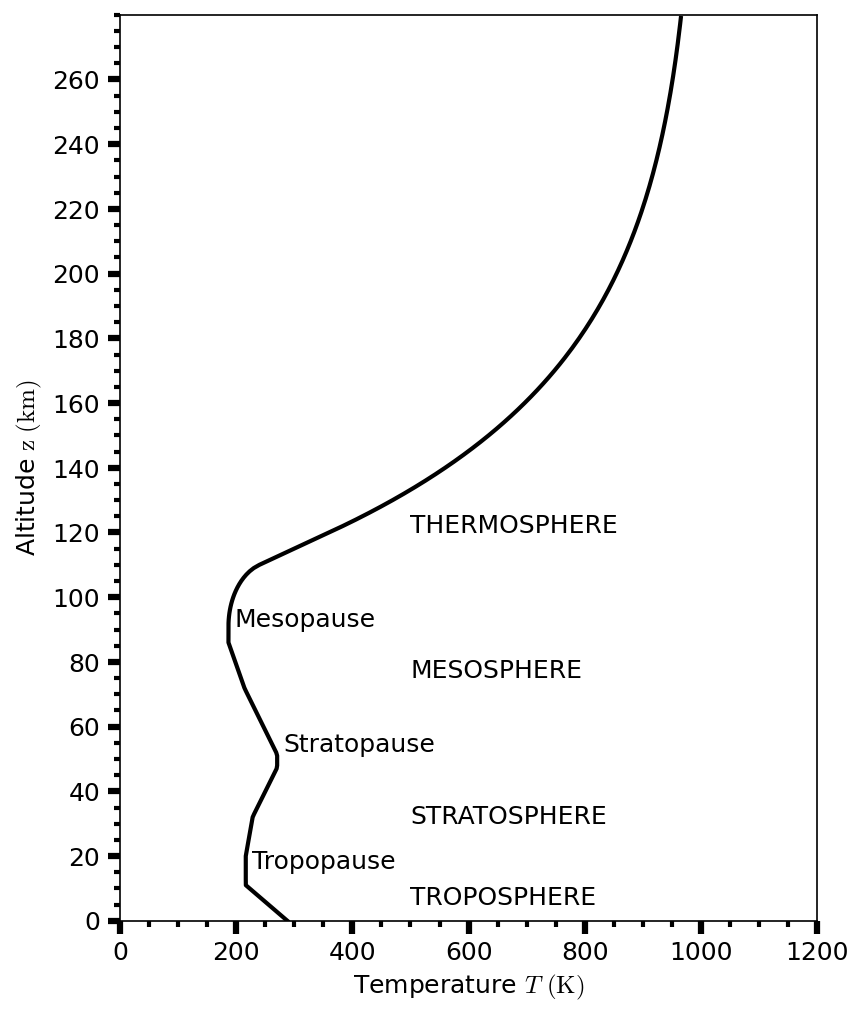

In [3]:
# Using example from poliastro
# https://docs.poliastro.space/en/stable/examples/Atmospheric%20models.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy import units as u
from poliastro.earth.atmosphere import COESA76
from myst_nb import glue

rcParams.update({'font.size': 12})
rcParams.update({'mathtext.fontset': 'cm'})

# We build the atmospheric instances
coesa76 = COESA76()

# Create the figure
fig = plt.figure(figsize=(6, 8), dpi=150)
ax = fig.add_subplot(111)

# Solve atmospheric temperature for each of the models
z_span = np.arange(0, 280, 1)
T_span = np.array([])
for z in z_span:
    T = coesa76.temperature(z*u.km)
    T_span = np.append(T_span, T.value)

# Temperature plot
ax.plot(T_span, z_span,'k-',lw=2)
ax.set_xlim(0, 1200)
ax.set_ylim(0, 280)
ax.set_xlabel("Temperature $T\ ({\\rm K})$")
ax.set_ylabel("Altitude $\\rm z\ (km)$")
ax.set_yticks(np.arange(0,280,20))

# Add some information on the plot
ax.annotate("Tropopause", xy=(coesa76.Tb_levels[1].value, coesa76.zb_levels[1].value), xytext=(coesa76.Tb_levels[1].value + 10, coesa76.zb_levels[1].value + 5))
ax.annotate("Stratopause", xy=(coesa76.Tb_levels[4].value, coesa76.zb_levels[4].value), xytext=(coesa76.Tb_levels[4].value + 10, coesa76.zb_levels[4].value + 5))
ax.annotate("Mesopause", xy=(coesa76.Tb_levels[7].value, coesa76.zb_levels[7].value), xytext=(coesa76.Tb_levels[7].value + 10, coesa76.zb_levels[7].value + 5))

layer_names = {"TROPOSPHERE": 5, "STRATOSPHERE": 30,
               "MESOSPHERE": 75, "THERMOSPHERE": 120}
for name in layer_names:
    ax.annotate(name, xy=(500, layer_names[name]), xytext=(500, layer_names[name]))

ax.minorticks_on()
ax.tick_params(which='major', axis='both',
               direction='out', length=6.0, width=3.0)
ax.tick_params(which='minor', axis='both',
               direction='out', length=3.0, width=2.0)

glue("Earth_profile_fig", fig, display=False);

### Sources and Transport of Energy
#### Heat Sources
Solar radiation heats planetary atmospheres through absorption of photons, where most of the Sun's energy output is in the visible range because the solar $5777\ {\rm K}$ blackbody curve peaks near $500\ {\rm nm}$.  These photons heat a planet's surface (i.e., terrestrial planets) or layers in the atmosphere where the optical depth is moderately large, which is typically near the cloud layers.

Re-radiation of sunlight by a planet's surface or atmospheric molecules, dust particles, or cloud droplets occurs primarily at IR wavelengths.  This source of heat exists within or below the atmosphere, where other internal heat sources may also heat the atmosphere from below (e.g., giant planets).

solar heating of the upper atmosphere is very efficient at extreme ultraviolet (EUV) wavelengths ($10-100\ {\rm nm}$) even though the number of photons is very low.  Typical EUV photons have enough energy ($10-100\ {\rm eV}$) to ionize several of the atmospheric constituents.  The excess energy from ionization is carried off by electrons freed in the process.

An upper atmosphere can be heated substantially by **charged particle precipitation**, which are charged particles that enter the atmosphere from above from the solar wind or a planet's magnetosphere.  On planets with intrinsic magnetic fields, charged particle precipitation is confined to high magnetic latitudes in the **auroral zones**.

#### Energy Transport

There are three distinct mechanisms to transport energy: *conduction*, *convection*, and *radiation*.

Conduction is important in the very upper part of the thermosphere, in the exosphere, and very near the surface (if one exists).  Collisions tend to equalize the temperature distribution, which results in a nearly isothermal profile (i.e., constant temperature with altitude) in the exosphere (see Fig. {numref}`{number}<thermal-profiles-fig>`).  The atmospheric temperature just above a surface tends to nearly equal the surface (ground) temperature.

Convection is important in the troposphere and the temperature profile is close to an adiabat (i.e., linear decrease in temperature with height).  The formation of clouds reduces the temperature gradient through the latent heat of condensation.  Convection effectively places an upper bound to the rate as which the temperature can decrease with height.

Radiation is important when the absorption and re-emission of photons (i.e., radiation) is the most efficient, where the thermal profile is governed by the equations of radiative energy transport.

Which process is most efficient depends on the temperature gradient $dT/dz$.  In the tenuous upper parts of the thermosphere, energy transport is dominated by conduction.  At deeper layers, down to a pressure of ${\sim}0.5\ {\rm bar}$, an atmosphere is usually in radiative equilibrium and convection dominates below this pressure.  On Mars, the combination of conduction (collisions) near/with the surface and radiation from the surface leads to a superadiabatic layer (i.e., ambient lapse rate $>$ adiabatic) just above ($\lesssim 100\ {\rm m}$) the surface during the day and an inversion layer (i.e., linear increase in temperature with height) at night.


```{figure-md} thermal-profiles-fig
<img src="thermal_profiles.png" alt="thermal profiles"  width="450px">

Schematic of thermal profiles: isothermal (vertical black), inversion (blue solid), adiabatic (red solid), superadiabatic (red dashed), and subadiabatic (red dotted).
```
### Observed Thermal Profiles
The observed effective temperatures of Jupiter, Saturn, and Neptune are substantially larger than the equilibrium values, which implies the presence of internal heat sources.  The observed surface temperatures of Venus, Earth, and Mars exceed the equilibrium valued because of a greenhouse effect.

The thermal structure in an atmosphere can be measured remotely via observations at different wavelengths, which probe different depths in an atmosphere because opacity is a strong function of wavelength. Although the altitudes probed differ between planets, we can make a few general statements:

- At optical and IR wavelengths, the radiative part of an optically thick atmosphere is probed.
- Convective regions at $P\gtrsim 0.5-1\ {\rm bar}$ can be investigated at IR and radio wavelengths.
- The tenuous upper levels ($P\lesssim 10\ {\rm \mu bar}$) are typically probed directly at UV wavelengths, or via stellar occultations at UV, visible, and IR wavelengths.

The profiles of terrestrial planets and Titan have been derived from *in situ* measurements by probes and/or landers.  For the giant planets, the temperature-pressure profiles were derived via inversion of IR spectra combined with UV and radio occultation profiles from *Voyager* and other spacecraft.  

At deeper levels in the atmosphere ($P{\sim} 1-5\ {\rm bar}$) where no direct information on the temperature structure can be obtained via remote observations, the temperature is usually assumed to follow the [adiabatic lapse rate](https://en.wikipedia.org/wiki/Lapse_rate).  *In situ* observations by the Galileo probe showed the temperature lapse rate in Jupiter's atmosphere is close to a dry adiabat.


````{panels}
```{figure-md} Venus-profile-fig
<img src="https://openstax.org/apps/archive/20220509.174553/resources/709cea32d63fac64528844568db38f7f93389a0c" alt="Venus profile"  width="450px">

The layers of the massive atmosphere of Venus shown here are based on data from the Pioneer and Venera entry probes.  Image Credit: OpenStax:[Astronomy](https://openstax.org/books/astronomy-2e/pages/10-3-the-massive-atmosphere-of-venus)
```

---

```{figure-md} Titan-profile-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Titan_atmosphere_detail_narrow.svg/800px-Titan_atmosphere_detail_narrow.svg.png" alt="Titan profile"  width="450px">

A graph detailing temperature, pressure, and other aspects of Titan's climate.  Image credit: Wikipedia:[Climate of Titan](https://en.wikipedia.org/wiki/Climate_of_Titan)
```
````

#### Earth
The average temperature just above Earth's surface is $288 {\rm K}$, while the average pressure at sea level is $1.013\ {\rm bar}$.  This temperature is $33\ {\rm K}$ above the equilibrium value, which can be directly attributed to the greenhouse effect due to the presence of water vapor, carbon dioxide, ozone  $(\rm O_3)$, methane, and nitrous oxide  $(\rm N_2O)$.

Earth's troposphere extends upward to ${\sim}20\ {\rm km}$ at the equator (see Fig. {numref}`{number}<Earth_profile>`) and to ${\sim}10\ {\rm km}$ at the poles.  The temperature in the stratosphere increases with altitude as a result of the presence (and formation) of ozone, which absorbs both at UV and IR wavelengths.  The mesosphere is characteristic of a decrease in temperature with increasing altitude at ${\sim}50\ {\rm km}$ due to a decreased  $(\rm O_3)$ production and increased $\rm CO_2$ cooling to space.  A second temperature minimum occurs at ${\sim}80-90\ {\rm km}$.  The temperature structure between Earth's stratosphere and mesosphere is unusual, because of the second temperature minimum.  Other massive atmospheres show a single temperature minimum, with the exception of Titan (and perhaps Saturn).  

Above the mesosphere lies the thermosphere.  in Earth's thermosphere, the temperature increases with altitude primarily because there are too few atoms/molecules to cool the atmosphere efficiently through emission in the IR.  Although, there is a smaller contribution to the heating due to the absorption of UV (through the destruction of ozone).  Most the IR emission originates from $\rm O$ and $\rm NO$, which radiate less efficiently than $\rm CO_2$.  At the base of the thermosphere, there is enough $\rm CO_2$ gas to cool the atmosphere.  The upper thermosphere heats up to $1200\ {\rm K}$ or more (during the day) and cools to ${\sim}800\ {\rm K}$ at night.

#### Venus
Venus' troposphere extends from the surface to the visible cloud layers at ${\sim}65\ {\rm km}$ (see Fig. {numref}`{number}<Venus-profile-fig>`).  The surface temperature is nearly uniform at $737\ {\rm K}$, while the atmospheric surface pressure is $92\ {\rm bar}$.  Venus has a very strong greenhouse effect (in the current epoch) primarily due to its massive $\rm CO_2$ atmosphere.  Venus' mesosphere extends from the top of the cloud layers up to ${\sim}90\ {\rm km}$.  In its thermosphere, there is a distinct difference between the day and night sides.  The day-side temperature reaches $300\ {\rm K}$ at $170\ {\rm km}$, while the night-side is much colder at $100-130\ {\rm K}$ and is called the **cryosphere**.

#### Mars
The average surface pressure on Mars is $6\ {\rm mbar}$, and the mean temperature is ${\sim}215\ {\rm K}$.  At Mars' mid-latitudes, the surface temperature varies from ${\sim}200\ {\rm K}$ (at night) to ${\sim}300\ {\rm K}$ during the day.  At the winter pole, the temperature plummets to ${\sim}130\ {\rm K}$ and the summer pole may reach ${\sim}190\ {\rm K}$.  Mars and Venus lack a stratosphere.  Mars' thermosphere has a temperature of ${\sim}200\ {\rm K}$ at altitudes above ${\sim}200\ {\rm km}$.  The low temperature can be explained b the efficiency of $\rm CO_2$ as a cooling agent.

#### Titan
The thermal structure in Titan's atmosphere has been measured by the [Huygens probe](https://en.wikipedia.org/wiki/Huygens_(spacecraft)) (see Fig. {numref}`{number}<Titan-profile-fig>`).  At the surface the temperature and pressure were measured at $93.65\ {\rm K}$ and $1.467\ {\rm bar}$, respectively.  This temperature results from the competing greenhouse and anti-greenhouse effects.

#### Giant Planets
Jupiter, Saturn, and Neptune emit roughly twice as much energy as they receive from the Sun.  The excess heat escaping from these planets is attributed to a slow cooling of the planets since their formation, along with energy released by $\rm He$ differentiation.  For Uranus, the upper limit to excess heat is 14% of the incoming solar radiation.  It is not known why Uranus' internal heat sources is so different from the other three giant planets.

## Atmospheric Composition
The composition of a planetary atmosphere can be measured via: (1) remote sensing techniques or (2) *in situ* using mass spectrometers on a probe or lander.  In a mass spectrometer, the atomic weight and number density of the gas molecules are measured.  Most molecules are not uniquely specified by their mass, and isotopic variations further complicate the situation using spacecraft.  Atmospheric composition is deduced from a combination of both techniques, along with theories regarding the most probable atoms or molecules to fit the mass spectrometer data.

*In situ* measurements have been made in the atmospheres of Venus, Mars, Jupiter, the Moon, Titan, Mercury, and Enceladus.  These data contain a wealth of information on atmospheric composition because trace elements can be measured with great accuracy as well as atoms and molecules that do not exhibit observable spectral features (e.g., nitrogen and the nobel gases).  

- A drawback of such measurements for a probe is they are limited in both space and time, where they are performed only along the path of the probe once.  
- Landers can measure they composition for a longer time, although they are limited to a single location.
- Rovers can measure the composition over longer timescales and over a range of positions, but the rovers move very slowly.

Thus, *in situ* data may not be representative of the atmosphere as a whole at all times.  Even though, such data are extremely valuable.

Spectral line measurements are performed in (1) reflected sunlight or (2) from a body's intrinsic thermal emission.  The shape of a spectral line contains information on the abundance of the gas, as well as the temperature and pressure of the environment.  The strongest spectral lines can be used to detect small amounts of trace gases (e.g., the giant planets) and the composition of extremely tenuous atmospheres (e.g., Mercury).  The line profile may contain information on the altitude distribution of the gas (through its shape) and the wind velocity field (through Doppler shifts).  The **abundances** can be specified by the **volume mixing ratios**, which are the fractional number density of particles (or mole fraction) of a given species per unit volume.

- Earth's atmosphere consists primarily of $\rm N_2$ (78%) and $\rm O_2$ (21%).  The most abundant trace gases are $\rm H_2O,\ Ar,$ and $\rm CO_2$, but many more have been identified.
- The atmospheres of Mars and Venus are dominated by $\rm CO_2$, roughly $95-97\%$ on each planet.  Nitrogen $(\rm N_2)$ contributes approximately 3% by volume, while most abundant trace gases are $\rm Ar,\ CO,\ H_2O,$ and $\rm O_2$.  On Venus, we also find a small amount of $\rm SO_2$, where ozone has been identified on Mars.  The differences in atmospheric composition with the Earth must result from differences in their **formation and evolutionary processes**, which include differences in temperature, volcanic and tectonic activity, and biogenic evolution.
- Titan's atmosphere is dominate by $\rm N_2$ gas, similar to Earth's atmosphere.  The second major species is *methane* gas.  The *Huygens* probe measured composition while descending through Titan's atmosphere.

If the giant planets had formed via a gravitational collapse like the Sun, then these planets are expected to have a composition similar to the solar nebula.  They are composed primarily of molecular hydrogen $\rm H_2$ (${\sim}80-90\%$ by volume) and helium (${\sim}10-15\%$ by volume).  However, helium appears to be depleted on Jupiter and Saturn, where carbon (in the form of methane gas) is enhanced compared with the solar nebula when accounting for the heliocentric distance.  Accurate measurements of the abundances of these species would help refine models of giant planet formation within the Solar System. 

### Sample Spectra
Figure {numref}`{number}<TP-spectra-fig>` shows coarse (low-resolution) thermal infrared spectra of Earth, Venus, and Mars between $5-50\ {\rm \mu m}$.  Each spectrum displays a broad $\rm CO_2$ absorption band at ${\sim}15\ {\rm \mu m}$.  The width of the absorption profile is similar for the three planets despite vas differences in pressure because a molecular absorption band consists of numerous transitions.

```{figure-md} TP-spectra-fig
<img src="https://personal.ems.psu.edu/~jfk4/PersonalPage/Jpgs/Resint24.jpg" alt="terrestrial planet spectra"  width="450px">

Thermal infrared spectra of Venus, Earth, and Mars. The 9.6-micron band of ozone is a potential bioindicator. (From R. Hanel, NASA Goddard Space Flight Center.) via [Jim Kasting](https://personal.ems.psu.edu/~jfk4/PersonalPage/ResInt2.htm)
```

Under clear conditions (i.e., when no other absorbers are present), the surfaces of Earth and Mars are probed in the far wings (continuum) of the band.  For Venus, the cloud deck rather than the surface is probed.  Higher altitudes are probed closer to the center of the band.  Because the profile is seen in absorption, the temperature must decrease with altitude on all three planets and $\rm CO_2$ must be present in their tropospheres.  Earth's spectrum has a small emission spike at the center of the $\rm CO_2$ absorption profile, which indicates some $\rm CO_2$ exists in the stratosphere. 

Other prominent feature in the terrestrial spectrum are ozone at $9.6\ {\rm \mu m}$ and methane at $7.66\ {\rm \mu m}$.  

- The emission spike at the center of the ozone profile.  
- Numerous water lines are visible in the spectrum, which make the Earth's atmosphere almost opaque in some spectral regions.  Water lines are also visible in the spectra of Mars and Venus.  
- The $\rm CO_2$ band prevents transmission near $15\ {\rm \mu m}$.

Because the emission and absorption lines in planetary atmospheres depend on the local temperature profile, spectra taken at different locations on a planet may appear very different eve if the concentrations of the absorbing gases are similar.  The $\rm CO_2$ absorption ban on Mars is seen in emission above the martian poles, which indicates that the atmospheric temperature must be higher than Mars' surface temperature at the poles.  Since the poles are covered by $\rm CO_2$ ice, such observations can be readily understood.

Figure {numref}`{number}<Titan-spectra-fig>` shows a thermal spectrum of Titan, which reveals numerous [hydrocarbons](https://en.wikipedia.org/wiki/Hydrocarbon) and [nitriles](https://en.wikipedia.org/wiki/Nitrile) in emission.  These compounds must form in Titan's stratosphere, where the temperature rises with altitude. 

```{figure-md} Titan-spectra-fig
<img src="Titan_spectra_Cassini.png" alt="Titan spectra"  width="600px">

Thermal infrared spectrum of Titan, obtained with *Cassini/CIRS* showing the various neutral organic molecules observed in Titan’s stratosphere [(Coustenis & Hirtzig 2009)](https://iopscience.iop.org/article/10.1088/1674-4527/9/3/001).
```

## Clouds
Earth's atmosphere contains a small $({\sim}1\%)$ and highly variable amount of water vapor.  If the abundance of water vapor (or any condensable species) is at its maximum vapor partial pressure, then the air is **saturated**.  Under equilibrium conditions, air cannot contain more water vapor than indicated by its **saturation vapor pressure curve** (Fig. {numref}`{number}<vapor_pressure>`a).  The saturation pressure of $\rm H_2O$ is given by the [Clausius-Clapeyron equation of state](https://en.wikipedia.org/wiki/Clausius%E2%80%93Clapeyron_relation):

```{math}
:label: CCEOS
P &= C_{\rm L}e^{-L_{\rm v}/(R_{\rm w}T)},
```

which depends on a constant $C_{\rm L}$, the [latent heat of vaporization](https://en.wikipedia.org/wiki/Latent_heat) of water $L_{\rm v}$, the [gas constant for water vapor](https://en.wikipedia.org/wiki/Water_vapor) $R_{\rm v}$, and the temperature $T$ (in $\rm K$).  The constant is determined by normalizing relative to the pressure at the triple point of water (${\sim}6.11\ {\rm mbar}$).

```{glue:figure} vapor_pressure_fig
:figwidth: 600px
:name: "vapor_pressure"

(a) Saturation vapor pressure curve for water, where the temperature $T$ (in $^\circ$C) primarily determines the partial pressure $P$. (b) Idealized sketch of the temperature structure in Earth's atmosphere, where the air follows a dry adiabat $({\sim}9.8\ {\rm ^\circ C/km})$ in the lower troposphere.  A wet air parcel starts to condense (as it rises) once the water vapor crosses the saturated vapor curve (at point $D$).  The temperature profile in the atmosphere follows the wet adiabat $({\sim}4-5\ {\rm ^\circ C/km})$ between $D$ and $T_{\rm tr}$, where there is a change in slope when the ice line is crossed.
```

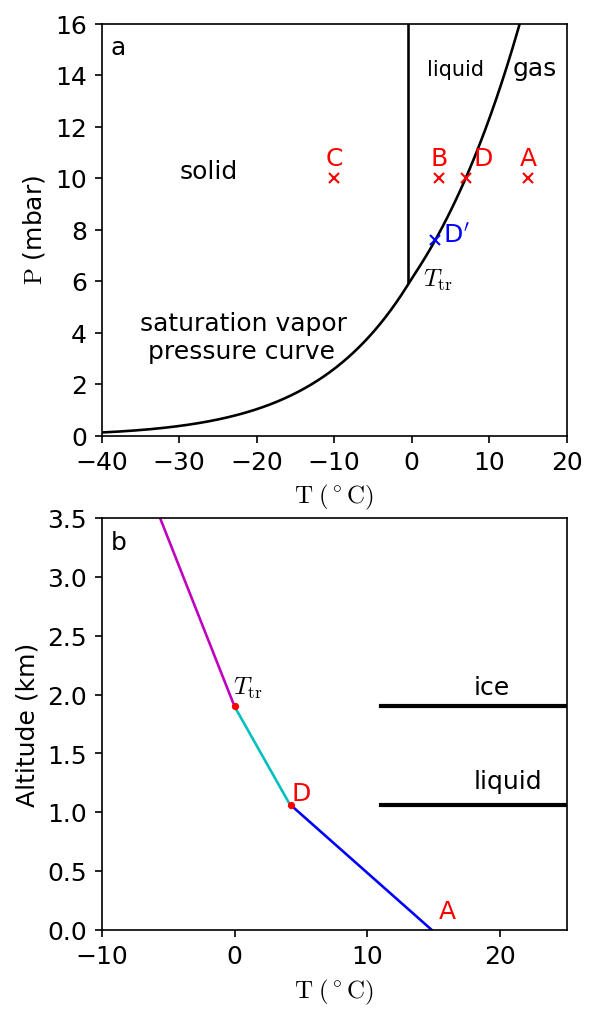

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.constants import R
from myst_nb import glue

rcParams.update({'font.size': 12})
rcParams.update({'mathtext.fontset': 'cm'})

def Clausius_Clapeyron_EOS(T):
    #Calculate the saturation vapor pressure as a function of temperature
    #https://www.e-education.psu.edu/meteo300/node/584
    #T = temperature (in Celsius)
    l_v = 2.501e6 #latent heat of vaporization in J/kg
    l_s = 2.834e6 #enthalpy of sublimation
    sub_zero = np.where(T<0)[0]
    R_v = 461.5 #gas constant for water vapor in J/kg/K
    p = 6.1094*np.exp(l_v/(R_v*273.16))*np.exp(-l_v/(R_v*(T+273.16))) #mbar for water
    p[sub_zero] = 6.1094*np.exp(l_s/(R_v*273.16))*np.exp(-l_s/(R_v*(T[sub_zero]+273.16)))
    return p

fs = 'medium'
lw = 1.25

fig = plt.figure(figsize=(4,8),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

T_rng = np.arange(-40,20,0.1) #temperature range in Celsius
vapor_press = Clausius_Clapeyron_EOS(T_rng)
ax1.plot(T_rng,vapor_press,'k-',lw=lw)
ax1.axvline(-0.5,vapor_press[397]/16,1,color='k',lw=lw)
ax1.text(-30,10,'solid',fontsize=fs)
ax1.text(2,14,'liquid',fontsize='small')
ax1.text(13,14,'gas',fontsize=fs)
x_marks = [-10,3.5,7,15]
y_marks = [10,10,10,10]
mark_lbl = ['C','B','D','A']
ax1.plot(x_marks,y_marks,'rx',ms=5)
for i in range(0,4):
    if i == 2:
        x_marks[i] += 2.25
    ax1.text(x_marks[i],10.5,mark_lbl[i],fontsize=fs,horizontalalignment='center',color='r')
ax1.plot(3,7.6,'bx',ms=5)
ax1.text(4,7.5,'D$^\\prime$',fontsize=fs,color='b')
ax1.text(1.5,5.8,'$T_{\\rm tr}$',fontsize=fs)
ax1.text(-35,3.,'saturation vapor \n pressure curve')

ax1.set_ylim(0,16)
ax1.set_xlim(-40,20)
ax1.set_ylabel("$\\rm P$ (mbar)",fontsize=fs)
ax1.set_xlabel("$\\rm T\ (^\circ C)$",fontsize=fs)
ax1.text(0.02,0.925,'a',transform=ax1.transAxes)

T1_rng = np.arange(4.25,15,0.1)
T2_rng = np.arange(0,4.25,0.1)
T3_rng = np.arange(-7,0,0.1)
ax2.plot(T1_rng,(-1./10)*T1_rng+1.485,'b-',lw=lw)
ax2.plot(T2_rng,(-1./5)*T2_rng+1.9,'c-',lw=lw)
ax2.plot(T3_rng,(-1./3.5)*T3_rng+1.9,'m-',lw=lw)
ax2.plot(4.25,1.06,'r.',ms=5)
ax2.text(5,1.1,'D',color='r',fontsize=fs,horizontalalignment='center')
ax2.plot(0,1.9,'r.',ms=5)
ax2.text(1,2,'$T_{\\rm tr}$',fontsize=fs,horizontalalignment='center')

ax2.axhline(1.9,0.6,1,color='k',lw=2)
ax2.axhline(1.06,0.6,1,color='k',lw=2)
ax2.text(16,0.1,'A',color='r',fontsize=fs,horizontalalignment='center')
ax2.text(18,2,'ice',fontsize=fs)
ax2.text(18,1.2,'liquid',fontsize=fs)
ax2.text(0.02,0.925,'b',transform=ax2.transAxes)

ax2.set_ylim(0,3.5)
ax2.set_xlim(-10,25)
ax2.set_ylabel("Altitude (km)",fontsize=fs)
ax2.set_xlabel("$\\rm T\ (^\circ C)$",fontsize=fs)

glue("vapor_pressure_fig", fig, display=False);

Water at a partial pressure of ${\sim}10\ {\rm mbar}$ in a parcel of air at $10\ {\rm ^\circ C}$ (e.g., point $A$ in Fig. {numref}`{number}<vapor_pressure>`a) is all in the form pof vapor.  Liquid water is present in parcels at ${\sim}0-5\ {\rm ^\circ C}$ (e.g., at point $B$ in Fig. {numref}`{number}<vapor_pressure>`a), and water ice forms at point $C$ (in Fig. {numref}`{number}<vapor_pressure>`a).  The solid lines indicate the saturated vapor curves for liquid and ice, where evaporation is balanced by condensation along these lines.  **Sublimation** occurs if ice transforms directly into a gas (e.g., $\lesssim 6\ {\rm mbar}$).  The triple point $T_{\rm tr}$ indicates where ice, liquid, and vapor coexist.

Consider a parcel of air at point $A$, with a vapor pressure of $10\ {\rm mbar}$ and a temperature of $15\ {\rm ^\circ C}$.  If the parcel is cooled, condensation starts when the solid line is first reached (moving leftward) at point $D$.  Upon further cooling, the partial vapor pressure decreases along the curve (from $D$ to $T_{\rm tr}$).  At $3\ {\rm ^\circ C}$ (point $D^\prime$), the water vapor pressure is $7.6\ {\rm mbar}$, where further chilling to $-10\ {\rm ^\circ C}$ results in the formation of ice upon crossing the second solid (vertical) line.  The vapor pressure above the ices is $2.6\ {\rm mbar}$ at $-10\ {\rm ^\circ C}$.

Figure {numref}`{number}<vapor_pressure>`b illustrates an idealized temperature structure in the Earth's troposphere, where the temperature in the lower troposphere follows a dry adiabat.  The labels $A$, $D$, and $T_{\rm tr}$ correspond to roughly the same points as in Fig. {numref}`{number}<vapor_pressure>`a.  A moist parcel of iar rising upward in the Earth's troposphere cools [adiabatically](https://en.wikipedia.org/wiki/Adiabatic_process) as it rises from $A$ to $D$.  At point $D$, the air parcel is saturated, where liquid water droplets condense out.  The condensation process releases heat (i.e., **latent heat of condensation**).  This decreases the atmospheric lapse rate (i.e., slope or change in temperature with altitude).  At $T_{\rm tr}$, the atmospheric temperature is $0\ {\rm ^\circ C}$ ($273.15\ {\rm K}$), and water-ice forms, which reduces the lapse rate even more because the latent heat of fusion is added to that of condensation.

The numerous water droplets and ice crystals that form this way make up **clouds**.  Clouds on other planets are composed of various condensable gases, where we find $\rm NH_3$, $\rm H_2S$, and $\rm CH_4$ clouds on the giant planets and $\rm CO_2$ clouds on Mars, in addition to $\rm H_2O$.  Clouds on Venus are composed of $\rm H_2SO_4$ droplets.  

Clouds affect the surface temperature and atmospheric structure by changing the radiative energy balance.  Clouds are highly reflective, where they reduce the incoming sunlight and cool the surface.  Clouds can also block the outgoing IR radiation, which increases the greenhouse effect.  The thermal structure of an atmosphere is influenced by cloud formation through changes to energy balance and the release of latent heat of condensation.

To account for the effect of clouds on a planet's climate (and habitability), a model needs to include (estimate) the cloud coverage, particle sizes, cloud altitudes, and even more parameters.  This if very difficult, which explains why evolutionary models of a planet's climate have substantial uncertainties.

**Relative humidity** is the ratio of the partial pressure of the vapor to that in saturated air.  The relative humidity in terrestrial clouds is usually $100\% \pm 2\%$.  The humidity can be as low as $70\%$ at the edge of a cloud caused by turbulent mixing or [entrainment](https://en.wikipedia.org/wiki/Entrainment_(meteorology)) of drier air.  In the interior layers, the humidity can be as high as $107\%$. 

## Meteorology
Particular weather patterns that vary with geographic location are associated with seasons on Earth.  Some locales can experience long periods of dry sunny weather, while at other times there can be long cold spells, periods of heavy rain, huge thunderstorms, blizzards, hurricanes, or tornadoes.  The basic motions of air caused by pressure gradients (induced by solar heating) and the rotation of a planetary body affect some weather patterns.

### Coriolis Effect
Winds are induced by atmospheric pressure gradients, where a high pressure region flows into an area of low pressure.  Due to planetary rotation, the winds cannot blow in a straight line and instead, follow a curved path.  Winds on Earth (or any other prograde rotating planet) are deflected to right on the northern hemisphere and to the left on the southern (and vice versa for retrograde rotators), which is called the **Coriolis effect** caused by a 'fictitious force' that causes the wind to curve called the [Coriolis force](https://en.wikipedia.org/wiki/Coriolis_force).

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/6L5UD240mCQ" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

The Coriolis effect follows from the conservation of *angular* momentum about the rotation axis.  A parcel of air at a latitude $\theta$ has an angular momentum per unit mass given by

\begin{align}
L = \left(\omega_{\rm rot}R\cos\theta + u \right)R\cos\theta,
\end{align}

which depends on the planet's radius $R$ and the $x$-component of the wind velocity $u$.  

If an air parcel initially at reset relative to the planet moves poleward while conserving angular momentum, then $u$ must grow in the direction of the planet's rotation to compensate for the decrease in $\cos \theta$.  A planet's rotation deflects the wind perpendicular to it original motion.  The direction of the wind is changed, but no work is done (since the acceleration is always perpendicular to the wind direction) and the wind speed is not altered.

### Winds Forced by Solar Heating
Differential solar heating induces pressure gradients in the atmosphere, which trigger winds.  Hadley circulation, eddies and vortices, thermal tidal winds, and condensation flows are some examples of wind flows that are triggered directly by solar heating.

#### Hadley Circulation
If a planet's rotation axis is approximately perpendicular to its orbital planet (i.e., its obliquity is approximately 0 degrees), then the planet's equator receives more solar energy (at the surface) than do other latitudes.  Hot air near the equator rises and flows towards regions with a lower pressure (i.e., poleward).  The air then cools, subsides and returns bact to the equator at low altitudes, where this motion is called **Hadley cell circulation**.

```{figure-md} atmos-cells-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/AtmosphCirc2.png" alt="atmospheric cells"  width="500px">

Atmospheric circulation diagram, showing the Hadley cell, the Ferrel cell, the Polar cell, and the various upwelling and subsidence zones between them.  Image Credit: Wikipedia:[atmospheric circulation](https://en.wikipedia.org/wiki/Atmospheric_circulation).
```

For a slowly rotating (or nonrotating) planet like Venus, there is one Hadley cell per hemisphere.  Rapidly rotating planets have [meridional winds](https://en.wikipedia.org/wiki/Zonal_and_meridional_flow) that are deflected, and the circulation pattern breaks up.

Earth has three mean-meridional overturning cells per hemisphere:

- The cell closest to the equator is called the Hadley cell.  
- The middle cell (or **Ferrel cell**) in each hemisphere circulates in a thermodynamically indirect sense, where the air rises at the cold end and sinks at the warm end of the pattern.
- The third cell closest to the poles is called the **polar cell**.

The giant planets rotate very rapidly, where latitudinal temperature gradients lead to a large number of zonal winds.  It the planet's rotation axis is not normal to its orbital plane, the Hadley cell circulation is displaced from the equator, and weather patterns can vary with season.  A planet with a large obliquity on an eccentric orbit (e.g., Mars) may have large orbit-averaged differences between the two polar regions.  Topology and other surface properties also affect the atmospheric circulation.

- The Hadley cells on Earth cause the well-known **easterly** (from the east) trade winds in the tropics because the return Hadley cell flow near the surface is deflected to the west by the Coriolis force.
- One might expect that **westerlies** occur at mid-latitudes on the low-altitude return flow in the Ferrel cell, however the situation is more complex in reality.

On giant planets, the large gradient in the Coriolis force with latitude leads to a large number of zonal winds, where the winds flow along lines of constant pressure (i.e., **isobars**).  The winds continue to blow if the pressure gradient and the Coriolis force just balance each other, which is known as **geostrophic balance**.

```{figure-md} isobars-wind-fig
<img src="geostrophic_current.png" alt="geostrophic current"  width="500px">

Schematic of geostrophic flow. The pressure gradient force (PGF) acts from high to low pressure. The Coriolis force is directed in the direction opposite to the PGF. The resulting Geostrophic flow is a balance between the PGF and the Coriolis force.  Image Credit: Wikipedia:[geostrophic current](https://en.wikipedia.org/wiki/Geostrophic_current).
```

It is possible that the centrifugal force of zonal winds (directed outward from the planetary surface) may balance the force induced by a meridional pressure gradient.  This is seen on Venus, where the zonal winds are very fast and is known as **cyclostrophic balance**.

#### Eddies and Vortices
Local topography on a terrestrial planet may induce stationary [eddies](https://en.wikipedia.org/wiki/Eddy_(fluid_dynamics)), which ar storms that do not propagate in an atmosphere.  Stationary eddies are seen over mountains on Earth (and Mars) and on Earth at the interface between oceans and continents where large temperature differences exist.

Eddies often form in transition layers between two flows.  The most common type of eddy are called **baroclinic eddies**, which form in an atmosphere with geostrophic flows and where the density varies along isobaric surfaces (i.e., constant pressure).  Only prograde (rotating in the direction of the flow) baroclinic eddies survive.  

```{figure-md} isobars-flow-fig
<img src="isobars_wind_flows.png" alt="wind flow"  width="500px">

Isobars and wind flows around (a) a high-pressure region (*anticyclone*)  and (b) a low-pressure region (*cyclone*) in the Earth's northern hemisphere.
```

The winds in baroclinic eddies flow along isobars, where the pressure (per area) force is balanced by the combined by the Coriolis and centrifugal forces (see Fig. {numref}`{number}<isobars-flow-fig>`). In [cyclones](https://en.wikipedia.org/wiki/Cyclone), the wind blows around a region of low pressure, whereas the wind blows around a high-pressure region in an [anticyclone](https://en.wikipedia.org/wiki/Anticyclone).  Cyclones and anticyclones appear in the atmospheres of Earth, Mars, and the giant planets (e.g., the [Great Red Spot](https://en.wikipedia.org/wiki/Great_Red_Spot) on Jupiter is an anticyclone).

#### Thermal Tides
If there is a large temperature difference between the day and night hemispheres of a planet, then air flows from the hot day side to the cool night side and are called **thermal tidal winds**.  A return flow occurs at lower altitudes.  The presence of these winds depends on the fractional change in temperature $(\Delta T/T)$ over the course of a day.  

The fractional change $\Delta T/T$ is typically less than 1% for planets with substantial atmospheres (e.g., Venus and the giant planets).  It can be large for planets with tenuous atmospheres, where it is ${\sim}20\%$ for Mars.  Strong thermal winds are expected near the surface only on Mars and planets/satellites with even more tenuous atmospheres.  Thermal tides are strong in the thermosphere of Earth and Venus, which is well above the visible cloud layers where the density is low and the day/night temperature difference is large.

#### Condensation Flows
On several bodies (e.g., Mars, Triton, and Pluto) gas condenses out at the winter pole and sublimes in the summer, which is a process that drives **condensation flows**.  At the martian summer pole, $\rm CO_2$ sublimes from the surface and enhances the mass of the atmosphere.  At the winter pole, it condenses directly on the surface or onto dust grains that fall down because of their increased weight.  Mars' atmospheric pressure varies by ${\sim}20\%$ from season-to-season due to its eccentric orbit.

Nitrogen and methane (i.e., condensable gases) may induce condensation flows on Triton and Pluto.  Such flows may explain why a fresh layer of ice overlayed most of Triton's equatorial regions during the *Voyager* flyby in 1989, but no ice cover was seen in warmer areas.  The *New Horizons* flyby of Pluto uncovered direct evidence of $\rm N_2$ condensation flows on its surface ([Forget et al. 2021](https://ui.adsabs.harvard.edu/abs/2021psnh.book..297F/abstract)).  Sulfur dioxide on Io sublimates on the day side and condenses at night, which may drive fast (supersonic) day-to-night-winds.

## Atmospheric Escape
A particle can escape a body's atmosphere if its kinetic energy exceeds the gravitational binding energy *and* it moves along an upward trajectory without colliding or being scattered by another atom or molecule.  Particle escape is possible in the **exosphere**, where the lower boundary is called the **exobase**.

The mean free path for collisions between molecules $\ell$ is given by

\begin{align}
\ell = \frac{1}{\sigma N},
\end{align}

which depends on the molecular cross-section $\sigma$ and the local (particle) number density.  The exobase is defined at an altitude $z_{\rm ex}$ in terms of a scale height $H$, where

\begin{align}
\int_{z_{\rm ex}}^\infty \sigma N(z)dz \approx \sigma N(z_{\rm ex})H = 1.
\end{align}

If the scale height $H$ is constant in the exosphere, then the exobase is given by $\ell(z_{\rm ex}) = H$.  Within the exosphere, the mean free path for a molecule (or atom) is comparable to (or larger than) the atmospheric scale height so that an atom has a reasonable chance of escaping.  Various nonthermal processes can also lead to escape in addition to thermal (or Jeans) escape.

### Thermal (Jeans) Escape
For a gas in thermal equilibrium, the velocities follow a [Maxwellian distribution function](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution), which depends on its kinetic properties (i.e., mass $m$, temperature $T$, and Boltzmann constant $k$) and is given by

\begin{align}
f(v)dv = \sqrt{\frac{2}{\pi}}\left(\frac{m}{kT}\right)^{3/2} Nv^2 e^{-mv^2/(2kT)}dv.
\end{align}

Collisions between particles drive the general velocity distribution into a Maxwellian distribution.  Above the exobase, collisions are negligible and particles in the tail of the Maxwellian velocity distribution with a velocity $v>v_{esc}$ may escape into space.  A Maxwellian distribution is characterized by a thermal or most probable velocity $v_{\rm mp} = \sqrt{2kT/m}$ that is larger than the mean velocity.

The ratio of the potential to kinetic energy is called the **escape parameter** $\lambda_{\rm esc}$ and is given by

\begin{align}
\lambda_{\rm esc} = \frac{GMm}{kT(R+z)} = \frac{R+z}{H(z)} = \left(\frac{v_{\rm esc}}{v_{\rm mp}}\right)^2.
\end{align}

Integrating the upward flux in a Maxwellian velocity distributing *above the exobase* results in the **Jeans formula** for the gas escape rate $(\rm atoms/m^2/s)$ by thermal evaporation or

\begin{align}
\Phi_{\rm J} = \frac{N v_{\rm mp}}{2\sqrt{\pi}} \left(1+\lambda_{\rm esc} \right) e^{-\lambda_{\rm esc}}.
\end{align}

Typical parameters for Earth are: $N = 10^{11}\ {\rm m^{-3}}$ and $T = 900\ {\rm K}$.  For atomic hydrogen $\lambda_{\rm esc} \approx 8$ and $\Phi \approx 6 \times 10^{11}\ {\rm atoms/m^2/s}$, which is ${\sim}3-4\times$ smaller than the limiting flux $\Phi_\ell \approx N_iD_i/H$.  The limiting flux depends on the number density $N$ and diffusion coefficient $D$ of a constituent $i$.  Lighter elements and isotopes are lost at a much faster rate than heavier ones.  [Jeans escape](https://en.wikipedia.org/wiki/Atmospheric_escape#Jeans_escape) can produce a substantial [isotopic fractionation](https://en.wikipedia.org/wiki/Isotope_fractionation).  Calculations of Jeans escape can be used to predict whether or not an object has an atmosphere (to first approximation). 

### Nonthermal Escape
Jeans escape gives a lower limit to the escape flux, where **nonthermal processes** (e.g., dissociation of molecules and charge exchange reactions) often dominate the escape rate.  In charge exchange, a fast ion may exchange a charge (typically an electron) with a neutral atom/molecule, where the ion loses its charge but retains its kinetic energy.  The new neutral (former ion) may have sufficient energy to escape the host body's gravitational attraction.

**Sputtering** is where an atmospheric atom may gain sufficient energy to escape when it is hit by a fast atom or ion.  Sputtering is usually caused by fast ions because it is much easier to accelerate an ion than an atom.

### Hydrodynamic Escape and Impact Erosion
In the early Solar System, atmospheric losses on many bodies were dominated by impact erosion and hydrodynamic escape.  [Hydrodynamic escape](https://en.wikipedia.org/wiki/Hydrodynamic_escape) occurs when a planetary wind composed of a light gas (e.g., hydrogen $\rm H$) sweeps along heavier gases, which by themselves would not escape according to the Jeans equation.  

Hydrodynamic escape requires a significant input of energy to the upper atmosphere.  Solar energy is usually not large enough to produce hydrodynamic escape in the atmosphere of a present-day terrestrial world.  The early atmospheres of Venus, Earth, and Mars may have underwent periods of hydrodynamic escape, triggered by intense solar UV radiation and a strong solar wind.

**Impact erosion** of the atmosphere of a terrestrial planet can occur during or immediately after a large impact.  Atmospheric gas can be swept into space by the momentum of a hydrodynamically expanding vapor plume produced upon impact.  Atmospheric escape occurs if this vapor plume attains escape velocity and if it has extra momentum to carry the intervening atmosphere with it.

- For an impactor (of radius $R$) that is smaller than the atmospheric scale height (i.e., $R<H$), shock-heated air flows around the impactor, and the energy is dispersed over a relatively large volume of the atmosphere.
- If the impactor is larger than the scale height, a large fraction of the shock-heated gas can be blown off because the impact velocity exceeds the escape velocity.

The mass of the atmosphere blown into space $M_{\rm e}$ is given by

\begin{align}
M_{\rm e} = \mathcal{E}_{\rm e}\pi R^2 \frac{P_o}{g},
\end{align}

which depends of the mass of the atmosphere per unit area $P_o/g$ and an enhancement factor $\mathcal{E}_{\rm e}$.  The enhancement factor determines the atmospheric mass that can escape, which is the mass intercepted by the impactor.  This is given by

\begin{align}
\mathcal{E}_{\rm e} = \frac{v_i^2}{v_{\rm esc}^2\left(1+\mathcal{E}_{\rm v} \right)},
\end{align}

and depends on the impact $v_i$ and escape $v_{\rm esc}$ velocities, along with the **evaporative loading parameter** $\mathcal{E}_{\rm v}$.  This parameter accounts for the burden imposed on escape because the plume also carries the vapor of both impactor and target material.  It is proportional to the energy imparted on the gas and the latent heat of evaporation $L_{\rm v}$ through the heat transfer coefficient $C_{\rm H}$ by

\begin{align}
\mathcal{E}_{\rm v} = C_{\rm H}\frac{v_i^2}{2L_{\rm v}},
\end{align}

which is ${\sim}0.1-0.2$ near Earth's surface.  A typical value of $L_{\rm v}$ for meteorites is ${\sim}8\times 10^6\ {\rm J/kg}$.

Significant escape occurs when $\mathcal{E}_{\rm e}>1$.  If the evaporative loading is much larger than the energy gained by impact heating (i.e., $\mathcal{E}_{\rm e}<1$), then the gas does not have enough energy to escape.  In the case of a colossal cratering event, the ejecta from the crater may also be large enough and contain sufficient energy to accelerate atmospheric gas to escape velocities.  Moreover, these impactors can remove all of the atmosphere above the horizon at the location of the impact.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/gX5JCYBZpcg" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

## History of Secondary Atmospheres

### Formation
Planetary growth involves the accumulation of solid materials, which can include gas trapped within some solids.  If a planet grows to a sufficient mass, then it can gravitationally trap gases from the protoplanetary disk.

- The atmospheres of giant planets are composed primarily of hydrogen and helium, with traces of carbon $(\rm C)$, oxygen $(\rm O)$, nitrogen $(\rm N)$, sulfur $(\rm S)$, and phosphorous $(\rm P)$ that combine with hydrogen to form $\rm CH_4$, $\rm H_2O$, $\rm NH_3$, $\rm H_2S$, and $\rm PH_3$, respectively.
- The atmospheres of terrestrial planets and satellites are dominated by $\rm CO_2$, $\rm N_2$, $\rm O_2$, $\rm H_2O$, and $\rm SO_2$.

The main difference between the giant and terrestrial planets is gravity, which allowed the giant planets to accrete large quantities of common species (e.g., hydrogen and helium).  The light elements $\rm H$ and $\rm He$ would have escaped the shallow gravitational potential wells of the terrestrial planets.

The current atmospheres of the terrestrial planets cannot be remnants of gravitationally trapped **primordial atmospheres**, and must have formed from outgassing of bodies accreted as solids.  The following chemical reactions can occur in an atmosphere composed of $\rm H_2$ and other volatiles:

\begin{align*}
{\rm CH_4} + {\rm H_2O} &\longleftrightarrow {\rm CO} + 3{\rm H_2}, \\
2{\rm NH_3} &\longleftrightarrow {\rm N_2} + 3{\rm H_2}, \\
{\rm H_2S} + 2{\rm H_2O} &\longleftrightarrow {\rm SO_2} + 3{\rm H_2}, \\
8{\rm H_2S} &\longleftrightarrow {\rm S_8} + 8{\rm H_2}, \\
{\rm CO} + {\rm H_2O} &\longleftrightarrow {\rm CO_2} + {\rm H_2}, \\
{\rm CH_4} &\longleftrightarrow {\rm C} + 2{\rm H_2}, \\
4{\rm PH_3} + 6{\rm H_2O} &\longleftrightarrow {\rm P_4O_6} + 12{\rm H_2}.
\end{align*}

A loss of hydrogen shifts the equilibrium towards the right, hence *oxidizing* the atmosphere.  An atmosphere is **reducing** if a substantial amount of hydrogen is present (e.g., on the giant planets), and **oxidizing** if little hydrogen is present (e.g., on the terrestrial planets).

If the atmospheres of the terrestrial planets were primordial (i.e., accreted from a solar composition gas similar to the giant planets) and all of the hydrogen and helium subsequently escaped, then the most abundant gases would be $\rm CO_2$ $({\sim}65\%)$, $\rm Ne$ $({\sim}22\%)$, and $\rm N_2$ $({\sim}10\%)$, with a small fraction of carbonyl sulfide $OCS$ $({\sim}4\%)$.  Solar concentrations for $\rm Ar$, $\rm Kr$, and $\rm Xe$ are also expected.  

These abundances are quite different from what is observed, where $\rm Ne$ occurs on Earth (at present) in miniscule amounts.  Similarly, nonradiogenic $\rm Ar$, $\rm Kr$, and $\rm Xe$ are present but at abundances over six orders of magnitude less than expected for a solar composition atmosphere.  These latter three noble gases are too heavy to escape via thermal process, if initially present, and could not be chemically confined to the condensed portion of the planet like $\rm CO_2$ is on Earth.

The observed small abundances of the noble gases provide strong evidence that the terrestrial planet atmospheres are secondary in origin.  A **secondary atmosphere** could have been produced:

1. during the accretion phase of the planet when impacts caused intense heating and/or by (late) accreting volatile-rich asteroids and comets,
2. at the time of core formation when the entire planet was molten, and/or
3. through 'steady' outgassing via volcanic activity.

The ratio of $^{40}{\rm Ar}/^{36}{\rm Ar}$ in Earth's present atmosphere indicates when gases were released into the atmosphere.  The lighter argon-36 is a primordial isotope that was incorporated into planetesimals only at extreme low temperatures ($<45\ {\rm K}$), while the heavier argon-40 originates from radioactive decay of potassium $^{40}{\rm K}$ (with a half-life of 1.25 Gyr).  Both the stable and radioactive isotopes of potassium are incorporated in forming minerals.  Upon decay of potassium-40, the resulting argon is released only when the mineral melts (see Fig. {numref}`{number}<primord-atmos-fig>`).

```{figure-md} primord-atmos-fig
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-020-62650-3/MediaObjects/41598_2020_62650_Fig8_HTML.png?as=webp" alt="primordial atmosphere"  width="600px">

Schematic view of the origin and evolution of heavy noble gases in the atmosphere. The Earth’s early atmosphere has a complex history of impact erosion, outgassing from the solid Earth and late supplies by asteroidal and cometary bombardments. Figure Credit: [Bekaert, Broadley, and Marty (2020)](https://www.nature.com/articles/s41598-020-62650-3#Fig8).
```

### Climate Evolution
A planet's surface temperature is determined mainly by solar insolation, its Bond albedo, and atmospheric opacity.  The Sun's luminosity has slowly increased during the past ${\sim}4.5\ {\rm Gyr}$.  In the early Solar System, the solar luminosity was ${\sim}25\%$ less than it is currently, which implies a lower surface temperature on the terrestrial planets.  Although the total energy output of the Sun was less, the Sun's X-ray and UV emission were much larger and the solar wind was stronger than present-day values.

The planetary albedos may have fluctuated as a result of variations in a planet's cloud deck, ground-ice coverage, and volcanic activity.  Changes in atmospheric composition have a profound effect on the climate due to the heat-trapping ability of greenhouse gases.  Variations in albedo can occur due to changes in ice cover and abundance of greenhouse gases.  **Positive feedback** mechanisms can occur, where the effect due to the primary input is amplified over several cycles as shown in Fig. {numref}`{number}<feedback-fig>`.

```{figure-md} feedback-fig
<img src="https://www.e-education.psu.edu/earth103/sites/www.e-education.psu.edu.earth103/files/module03/fig13fdbk.png" alt="climate feedback"  width="600px">

Schematic illustration of two feedback mechanisms that are important in Earth’s climate system. Each feedback mechanism, as depicted above, may be triggered by either a warming or a cooling; in either case, they trigger an amplifying or countering effect. Note that the positive feedback mechanism, left to its own devices, could lead to runaway cooling and a completely frozen Earth, but positive feedbacks will generally activate negative feedback mechanisms that limit the runaway tendency of positive feedbacks. Figure Credit: [David Bice @ Penn State University](https://www.e-education.psu.edu/earth103/node/668).
```

An increase in a planet's albedo (i.e., reflecting more energy to space) will lower the planet's temperature, which will increase the snow production and surface ice cover as more $\rm H_2O$ freezes out.  This can eventually lead to phenomenon known as [Snowball Earth](https://en.wikipedia.org/wiki/Snowball_Earth).  Alternatively, a decrease in albedo (i.e., reflecting less energy to space) leads to a warming of the planet, where evaporation/sublimation of snow and ice decreases the albedo even more.  Because water vapor is a greenhouse gas, this scenario is closely coupled to the second positive feedback illustrated in Fig. {numref}`{number}<feedback-fig>`.  Small changes in the input energy can have large effects on a planet's climate when a positive feedback occurs and could ultimately lead to a **runaway greenhouse effect**.

Periodic orbital variations (e.g., the Milankovitch cycles) or sudden modifications in a planet's orbital eccentricity and obliquity (e.g., caused by a giant impact) also play a role in climate evolution.  In particular, the ${\sim}\text{40,000}$- and $\text{100,000}$-year cycles of Earth's ice ages have been attributed to the Milankovitch cycles (see Fig. {numref}`{number}<milankovitch-fig>`).

```{figure-md} milankovitch-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Milankovitch_Variations.png" alt="milankovitch cycles"  width="600px">

Changes in the orbital precession, obliquity, and eccentricity contribute to latitudinally dependent changes in solar forcing.  These effects correlate with the Earth's prior stages of glaciation. Image Credit: Wikimedia:[Milankovitch variations](https://commons.wikimedia.org/wiki/File:Milankovitch_Variations.png) by user Robert Rohde.
```

#### Earth
Even though the young Sun's luminosity was lower, the presence of sedimentary rocks and the possible absence of glacial deposits on Earth about 4 Gyr ago suggest that the Earth may have been *even warmer* than today.  If true, this could be attributed to an increased greenhouse effect because the atmospheric $\rm H_2O$, $\rm CO_2$, and $\rm CH_4$ (and possibly $\rm NH_3$) content was likely larger during the early stages of outgassing.

One might expect that an increase in $\rm CO_2$ would lead to a continuous increase in a planet's temperature.  However, the long-term cycling of $\rm CO_2$ may be regulated so that the Earth's surface temperature does not change too much over *long* (i.e., many 1000s of years) time periods.  Carbon dioxide is removed from the atmosphere-ocean system via the **Urey weathering reaction** (or [Carbon-silicate cycle](https://en.wikipedia.org/wiki/Carbonate%E2%80%93silicate_cycle)), which is a chemical reaction between $\rm CO_2$, dissolved water (e.g., rain), and the silicate minerals in the soil.  

```{figure-md} urey-weathering-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Carbon-Slicate_Cycle_Feedbacks.jpg" alt="urey weathering"  width="600px">

This schematic shows the relationship between the different physical and chemical processes that make up the carbonate-silicate cycle. In the upper panel, the specific processes are identified, and in the lower panel, the feedbacks associated are shown; green arrows indicate positive coupling, while yellow arrows indicate negative coupling. Image Credit: Wikipedia:[Carbon-silicate cycle](https://en.wikipedia.org/wiki/Carbonate%E2%80%93silicate_cycle).
```

This cycling of $\rm CO_2$ between the atmosphere and other reservoirs is shown in Figure Fig. {numref}`{number}<urey-weathering-fig>`.  The reaction releases calcium $\rm Ca$ and magnesium $\rm Mg$ ions, which converts $\rm CO_2$ into bicarbonate $(\rm HCO_3^-)$.  The bicarbonate reacts with ions to form other carbonate minerals.  An example of this reaction for calcium is given by

\begin{align}
{\rm CaSiO_3} + 2{\rm CO_2} + {\rm H_2O} &\rightarrow {\rm Ca^{++}} + {\rm SiO_2} + 2{\rm HCO_3^-}, \\
{\rm Ca^{++}} + 2{\rm HCO_3^-} &\rightarrow {\rm CaCO_3} + {\rm CO_2} + {\rm H_2O}.
\end{align}

Most of the calcium carbonates on Earth are produced by organisms in the oceans.  Carbonate sediments on the ocean floor are carried downwards by plate tectonics and are transformed back into $\rm CO_2$ in the high-temperature and high-pressure environment of the Earth's mantle by the following reaction:

\begin{align}
{\rm CaCO_3} + {\rm SiO_2} \rightarrow {\rm CaSiO_3} + {\rm CO_2}.
\end{align}

Volcanic outgassing returns the $\rm CO_2$ to the atmosphere.  The weathering rate increases when the surface temperature is higher, the surface temperature *is related* to the $\rm CO_2$ content of the atmosphere through the greenhouse effect.  This effectively institutes a self-regulation in the atmospheric ${\rm CO_2}$ abundance on Earth.  The role of this carbonate-silicate weather cycle during the recovery from glaciations is well established.

The abundance of ${\rm O_2}$ in the Earth's atmosphere is primarily attributable to the photosynthesis of green plants (and microorganisms) with a small contribution from past photodissociation of $\rm H_2O$.  The molecular oxygen $\rm O_2$ in our atmosphere rose to significant levels about 2.2 Gyr ago (see Fig. {numref}`{number}<goe-fig>`).  The presence of iron carbonate $(\rm FeCO_3)$ and uranium dioxide $(\rm UO_2)$ in sediments that date back to more than 2.2 Gyr ago and it absence in younger sediments provide evidence for the presence of free oxygen in Earth's atmosphere over the past 2.2 Gyr because oxygen destroys these compounds today.

```{figure-md} goe-fig
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41467-021-23286-7/MediaObjects/41467_2021_23286_Fig1_HTML.png?as=webp" alt="great oxidation"  width="600px">

Multiple lines of geologic and geochemical evidence support the view that oxygen gas first became a permanent component of Earth's atmosphere and surface ocean ${\sim}2.4$ billion years ago. Sedimentary iron formation (a), which requires transport of ferrous iron through the ocean, is abundant in successions that predate the GOE but uncommon afterward. The blue shaded region denoting atmospheric $\rm O_2$ levels is only notional, as it is possible that atmospheric $\rm pO_2$ dropped below 1% of present atmospheric levels (PAL) during the Proterozoic. Figure Credit: [Olejarz, Iwasa, Knoll, and Nowak (2021)](https://www.nature.com/articles/s41467-021-23286-7).
```

The most striking evidence of a low oxygen abundance on Earth is provided by [banded iron formations](https://en.wikipedia.org/wiki/Banded_iron_formation) (BIFs) on the ocean floor, a sediment that consists of alternating (few cm thick) layers of iron oxides (e.g., hematite and magnetite) and sediments (e.g., shale and chert).  Banded iron formations imply that iron deposits built up in sea water, something that cannot occur in today's oxygen-rich oceans.

Since BIFs are common in sediments laid down prior to 1.85 Gyr ago but very rare in more recently formed rocks, then free oxygen must have been a rare commodity more than 2 Gyr ago.  The rise of oxygen coincided with a large ice age.  The increase in $\rm O_2$ may have eliminated much of the methane gas by reducing its photochemical lifetime and constraining the environments in which methanogens (methane-producing archaebacteria) could survive.

The influence of humans on the evolution of the Earth's atmosphere at the present time should not be discounted.  The $\rm CO_2$ and $\rm CH_4$ levels in our atmosphere which is leading to a global warming through enhancement of the greenhouse effect.  Figure {numref}`{number}<ice-cores-fig>` illustrates the correlation between $\rm CO_2$ and $\rm CH_4$ atmospheric levels with global temperature variations.

```{figure-md} ice-cores-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Vostok_420ky_4curves_insolation.jpg/1280px-Vostok_420ky_4curves_insolation.jpg" alt="ice core data"  width="600px">

420,000 years of ice core data from Vostok, Antarctica research station.  The atmospheric levels of $\rm CO_2$ and $\rm CH_4$ both correlate with changes in global temperature. Image Credit: Wikipedia:[Milankovitch cycles](https://en.wikipedia.org/wiki/Milankovitch_cycles).
```

Although the increased temperature will also increase the weathering rate, these geophysical process occur on much longer timescales that the present accumulation of $\rm CO_2$ and $\rm CH_4$ into the atmosphere.  Increased absorption (dissolution) of $\rm CO_2$ in seawater has been measured already, which causes the ocean to acidify (i.e., a decrease in the ocean's pH).  **Ocean acidification** may have serious consequences for marine ecosystems.

#### Mars
Mars' small size and heliocentric distance are important causes for the difference in climate between Mars and Earth.  Liquid water cannot exist in significant quantities on Mars' surface at the present time, but the numerous channels on the planet, layers of sandstone, and minerals that can only form in the presence of water are suggestive of running water in the past.  This implies that Mars' atmosphere must have been denser and warmer.

The runoff channels are confined to the ancient, heavily cratered terrain, which means that the warm martian climate did not extend beyond about 3.8 Gyr ago.  Models of Mars' early atmosphere suggest a mean surface pressure of ${\sim}1\ {\rm bar}$ and a temperature close to $300\ {\rm K}$.  Widespread volcanism, impacts by planetesimals, and tectonic activity must have provide large sources of ${\rm CO_2}$ and $\rm H_2O$, whereas impacts by very large planetesimal may have led to (repeated) losses of atmospheric gases through impact erosion.

In addition to atmospheric escape into space, Mars has probably lost most of its $\rm CO_2$ via carbonaceous (weathering) processes, adsorption onto the regolith and/or condensation onto the surface.  The $\rm CO_2$ cannot be recycled back into the atmosphere because Mars does not currently show [tectonic activity](https://en.wikipedia.org/wiki/Tectonics_of_Mars), but NASA's Insight mission has detected two [marsquakes](https://www.nasa.gov/feature/jpl/nasa-s-insight-detects-two-sizable-quakes-on-mars).  

Without liquid water on the surface, weathering has ceased, and Mars has retained a small fraction of its $\rm CO_2$ atmosphere.  The present abundance of $\rm H_2O$ on Mars is still being determined.  Most of the $\rm H_2O$ might have escaped and/or there may be large amounts of subsurface water-ice on the planet.  A potential problem with the weathering theory is the apparent lack of carbonates on the martian surface, although this can be reconciled if the water was very acidic.

Mars also goes through Milankovitch cycles, where the much larger variations in orbital eccentricity and obliquity has affected its climate.  For Mars, these parameters have periodicities about 10 times larger than for Earth, and departures from the mean values are also much larger.  The polar regions receive more sunlight when the obliquity is large, and large eccentricities increase the relative amount of sunlight falling on the summer hemisphere at perihelion.  The layered deposits in Mars' polar region along with glaciations in the tropics and at mid-latitudes suggest that such periodic changes have taken place on Mars.

The Tharsis region of Mars contains many volcanoes that appear to be roughly the same age.  The eruptions of these volcanoes must have enhanced the atmospheric pressure and the surface temperature via the greenhouse effect.  However, the sparsity of impact craters implies that the volcanic eruptions occurred well after the formation of the runoff channels on Mars' highlands.

#### Venus
Venus is very dry, with an atmospheric $\rm H_2O$ abundance of only 100 parts per million (ppm).  In contrast, Earth's oceans have about $10^5$ times as much water.  Various theories have been offered to explain the lack of water on Venus.

It could have simply formed with very little water because the minerals that condensed in this relatively warm region of the solar nebula lacked water.  However, mixing of planetesimals between the accretion zones and asteroid/cometary impacts could have provided similar amounts of volatiles to Earth and Venus.  

It seems probable that there was an appreciable fraction of a terrestrial ocean on early Venus.  The $\rm D/H$ ratio on Venus is about $100\times$ larger than on Earth, which is persuasive evidence that Venus was once much wetter than it is now.  But where did all the water go?  Water can be dissociated into hydrogen and oxygen, either by photodissociation or chemical reactions, and the hydrogen then escapes into space.

The classical explanation for Venus' water loss is through a runaway greenhouse effect.  A simple climate model, which assumes that Venus outgassed a pure-water vapor atmosphere shows that the surface temperature increases due to an enhanced greenhouse effect.  There is a positive feedback between the increasing temperature and increasing opacity.  On Venus, the temperature stayed well above the saturation pressure curve (i.e., the water did not condense to become a liquid again), which led to a runaway greenhouse effect, and all of Venus' water accumulated in the atmosphere as steam.  Assuming an effective mixing process, the water is distributed throughout the atmosphere and is photodissociated at high altitudes, which allows for the subsequent escape of hydrogen atoms to space.

A simple model (in Figure {numref}`{number}<classical_runaway>`) illustrates this process using the Clausius-Clapeyron equation of state (Eqn. {eq}`CCEOS`), the greenhouse effect (Eqn. {eq}`surface_greenhouse`), and a relation between the vapor pressure $p^*(T)$ and optical depth ([Nakajima, Hayashi, & Abe (1992)](https://journals.ametsoc.org/view/journals/atsc/49/23/1520-0469_1992_049_2256_asotge_2_0_co_2.xml)) given as

\begin{align}
\tau = \frac{\kappa}{g}p^*(T),
\end{align}

which depends on an absorption coefficient of water $\kappa \approx 0.003\ {\rm kg/m^2}$ and the surface gravity $g$.  This model is adapted from [Goody & Walker (1972)](https://ui.adsabs.harvard.edu/abs/1972atmo.book.....G/abstract), where Venus (along with Mars and Earth) formed airless at the current distance from the Sun and volcanoes belched out atmospheres of pure water vapor.  If enough water vapor was present to create a greenhouse effect, then the surface temperature would rise accordingly.  Each planet in the model is assumed to have an albedo equivalent to present-day Mars, which is important for determining the equilibrium temperature (Eqn. {eq}`T_eq`).

Mars started out with the coldest surface and equilibrium temperature $({\sim}215\ {\rm K})$.  As the vapor pressure builds, Mars reaches a phase transition where the water vapor freezes into ice (at about $0.02\ {\rm mbar}$) and is shown by the cyan curve in Fig. {numref}`{number}<classical_runaway>`.  The Earth begins a little warmer, where enough water vapor accumulates to create a slight greenhouse effect (i.e., the blue curve bends slightly upward in Fig. {numref}`{number}<classical_runaway>`).  However, the water vapor is able to condense into liquid water instead of ice.  Venus is even closer to the Sun, where its surface begins at ${\sim}315\ {\rm K}$.   This allowed large amounts of water vapor to accumulate in Venus' atmosphere, which was enough for a large greenhouse effect before saturation was reached (the red curve in Fig. {numref}`{number}<classical_runaway>`).  Since it never intersects the saturation vapor pressure curve, the vapor doesn't condense to form ocean and Venus' surface temperature "runs away" in this calculation.

```{glue:figure} classical_runaway_fig
:figwidth: 600px
:name: "classical_runaway"

Diagram illustrating the "classical" runaway greenhouse effect from the model described by [Goody & Walker (1972)](https://ui.adsabs.harvard.edu/abs/1972atmo.book.....G/abstract).
```

An alternative model to explain Venus' water loss is the [moist greenhouse effect](https://en.wikipedia.org/wiki/Runaway_greenhouse_effect#The_moist_greenhouse_limit).  This model relies on moist convection, where Venus had a surface temperature near the boiling point of water $(100^\circ {\rm C})$.  Convection transported the saturated air upward.  Water condensed out, and the latent heat of condensation led to a decrease in the atmospheric lapse rate (i.e., change in temperature with altitude) and increased the altitude of the tropopause.  In this scenario, water vapor naturally reached high altitudes, where it was dissociated and escaped into space.  

With the accumulation of water vapor in the atmosphere, the atmospheric pressure increased, which prevents the oceans from [boiling](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/States_of_Matter/Phase_Transitions/Boiling).  The oceans continue to evaporate because of the rapid water loss rate from the top of the atmosphere.  As long as there was liquid water on the surface, $\rm CO_2$ and $\rm O_2$ were removed from the atmosphere by weathering processes.  When the liquid water was gone, $\rm CO_2$ could not form carbonate minerals and accumulated in the atmosphere.

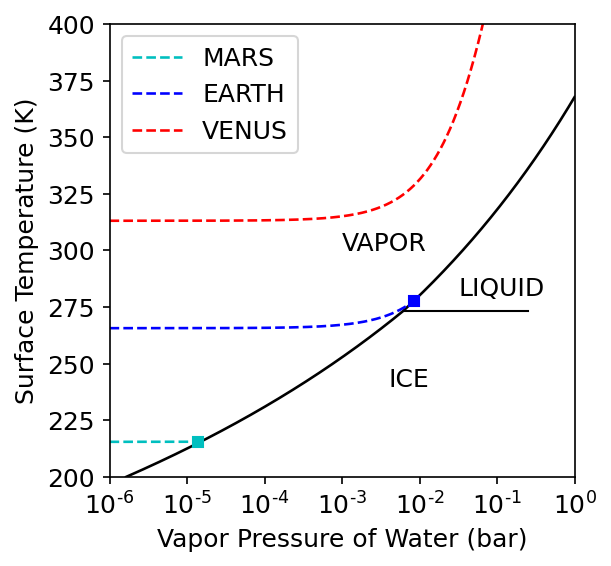

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.constants import R, sigma
from myst_nb import glue

rcParams.update({'font.size': 12})
rcParams.update({'mathtext.fontset': 'cm'})

def saturation_pressure(T):
    #T = temperature (in Kelvin)
    R = 461.5 #J/K/kg
    l_v = 2.5e6 #latent heat of vaporization in J/kg
    l_s = 2.834e6 #enthalpy of sublimation
    sub_zero = np.where(T<273.15)[0]
    p = 6.11e-3*np.exp(l_v/(R*273.16))*np.exp(-l_v/(R*T))
    p[sub_zero] = 6.11e-3*np.exp(l_s/(R*273.16))*np.exp(-l_s/(R*T[sub_zero]))
    return p

def surface_temp(tau,ap):
    #tau = optical depth
    #ap = semimajor axis (in AU)
    #g = acceleration due to gravity (in m/s^2)
    S = S_o/ap**2 #Solar flux at TOA
    T_e = (S*(1-A_mars)/(4.*sigma))**0.25
    return T_e*(1+0.75*tau)**0.25

fs = 'medium'
lw = 1.25

surf_grav = [3.721, 9.8, 8.87]
a_p = [1.52,1.,0.72]
A_mars = 0.17 #albedo of Mars
k_v = 0.003
S_o = 1361 #Solar constant in W/m^2
pl_lbl = ['MARS','EARTH','VENUS']

fig = plt.figure(figsize=(4,4),dpi=150)
ax1 = fig.add_subplot(111)

T_rng = np.arange(200,400,0.1) #temperature range (in K)
vapor_press = saturation_pressure(T_rng)
ax1.plot(vapor_press,T_rng,'k-',lw=lw)
ax1.axhline(273.16,0.635,0.9,color='k',lw=1)

press = np.logspace(-6,0,len(vapor_press))
col = ['c','b','r']
for i in range(0,3):
    tau_g = k_v*press*1e5/surf_grav[i]
    T_g = surface_temp(tau_g,a_p[i])
    vapor_T = saturation_pressure(T_g)
    cutoff = np.where(np.abs(vapor_T-press)<1e-6)[0]
    if len(cutoff) == 0:
        cutoff = len(T_g)-1
    else:
        cutoff = cutoff[0]
    ax1.plot(press[:cutoff],T_g[:cutoff],'--',color=col[i],lw=lw,label=pl_lbl[i])
    ax1.plot(press[cutoff],T_g[cutoff],'s',color=col[i],ms=5)
ax1.legend(loc='upper left',fontsize=fs)
ax1.set_xlim(1e-6,1)
ax1.set_ylim(200,400)

ax1.text(0.5,0.5,'VAPOR',transform=ax1.transAxes)
ax1.text(0.6,0.2,'ICE',transform=ax1.transAxes)
ax1.text(0.75,0.4,'LIQUID',transform=ax1.transAxes)

ax1.set_xlabel("Vapor Pressure of Water (bar)",fontsize=fs)
ax1.set_ylabel("Surface Temperature (K)",fontsize=fs)

ax1.set_xscale('log');
ax1.set_xticks([1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1])

glue("classical_runaway_fig", fig, display=False);

## **Homework**